# Solar Radiation on Agricultural Soil Conditions Using Data Science and AI Models

Load Libraries: We'll need to import pandas for data handling and os for navigating the file system.

Read Files: loop through the directory containing the CSV files, read each one, and modify the data accordingly.

Modify Data: Add a new column that captures the location extracted from the filename.

The Dataset is in the data folder with reference and source.

In [292]:
import pandas as pd
import os

# Define the directory 
directory_path = '../dataset'
dataframes = []

# Loop through all files 
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Extract location 
        location = filename.split(' 2014-')[0]
        
        # Add a new column for the location
        df['Location'] = location
        
        # Append the dataframe to the list
        dataframes.append(df)

# Combine all 
combined_df = pd.concat(dataframes, ignore_index=True)

# Show 
print(combined_df.head())


     datetime  temp  humidity  precipcover preciptype  windspeed  \
0  2014-01-01   3.2      58.0         0.00        NaN       15.6   
1  2014-01-02   2.0      82.6        29.17  rain,snow       17.6   
2  2014-01-03  -5.4      54.4        12.50  rain,snow       47.9   
3  2014-01-04  -3.8      53.2         0.00        NaN       20.9   
4  2014-01-05   2.8      79.1        20.83  rain,snow       17.0   

   sealevelpressure  cloudcover  solarradiation  solarenergy  ...  \
0            1027.0        66.2           117.6         10.2  ...   
1            1011.9        95.1            34.1          2.9  ...   
2            1021.9        39.5           126.7         10.9  ...   
3            1030.9        16.1           125.7         10.9  ...   
4            1020.0        97.5            24.0          1.9  ...   

   windspeed100  winddir100  ghiradiation  dniradiation  difradiation  \
0           0.0         NaN           NaN           NaN           NaN   
1           0.0         NaN   

The column summary

Location column consists of Boston, New York, Atlanta, West Palm Beach, Chicago, Los Angeles, Seattle, Roswell, and Lakewood. 

The key features are solar energy, solar radiation, soil moisture, and soil temperature. 

For solar radiation, we also detailed into Direct normal radiation, Diffuse normal radiation, Global horizontal radiation, and Global tilt radiation.

In [293]:
combined_df.columns

Index(['datetime', 'temp', 'humidity', 'precipcover', 'preciptype',
       'windspeed', 'sealevelpressure', 'cloudcover', 'solarradiation',
       'solarenergy', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
       'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
       'windspeed50', 'winddir50', 'windspeed80', 'winddir80', 'windspeed100',
       'winddir100', 'ghiradiation', 'dniradiation', 'difradiation',
       'gtiradiation', 'sunelevation', 'Location', 'DATE', 'IY111'],
      dtype='object')

Then, need to clean the dataset.

First, we check if the dataset is imbalanced

In [294]:

missing_values_count = combined_df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
datetime              220
temp                  220
humidity              220
precipcover           220
preciptype          20379
windspeed             220
sealevelpressure      220
cloudcover            220
solarradiation        220
solarenergy           220
soiltemp01           3882
soiltemp04           3882
soiltemp10           3882
soiltemp20           3882
soilmoisture01       3882
soilmoisture04       3882
soilmoisture10       3882
soilmoisture20       3882
windspeed50           220
winddir50            3860
windspeed80           220
winddir80            3860
windspeed100          220
winddir100           3860
ghiradiation         3860
dniradiation         3860
difradiation         3860
gtiradiation         3860
sunelevation          220
Location                0
DATE                36530
IY111               36530
dtype: int64


Based on the result of the missing value analysis:

We need to remove the preciptype column since this column has a substantial number of missing values and not critical for analyzing the impact of solar radiation on soil conditions.

Then, we also remove rows with missing values in the soil and wind-related columns: Given the significant count of missing values in soiltemp01, soiltemp04, soiltemp10, soiltemp20, soilmoisture01, soilmoisture04, soilmoisture10, soilmoisture20, winddir50, winddir80, winddir100.


In [295]:
# Remove 'preciptype' column
combined_df.drop('preciptype', axis=1, inplace=True)

# Define columns where NaN rows should be removed
columns_with_nan = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
                    'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
                    'winddir50', 'winddir80', 'winddir100', 'gtiradiation']

# Remove rows with NaN 
combined_df.dropna(subset=columns_with_nan, inplace=True)

# check
remaining_missing_values = combined_df.isnull().sum()
print("Remaining missing values in each column:")
print(remaining_missing_values)

# Show the first few rows of the updated DataFrame
print(combined_df.head())


Remaining missing values in each column:
datetime                0
temp                    0
humidity                0
precipcover             0
windspeed               0
sealevelpressure        0
cloudcover              0
solarradiation          0
solarenergy             0
soiltemp01              0
soiltemp04              0
soiltemp10              0
soiltemp20              0
soilmoisture01          0
soilmoisture04          0
soilmoisture10          0
soilmoisture20          0
windspeed50             0
winddir50               0
windspeed80             0
winddir80               0
windspeed100            0
winddir100              0
ghiradiation            0
dniradiation            0
difradiation            0
gtiradiation            0
sunelevation            0
Location                0
DATE                32868
IY111               32868
dtype: int64
       datetime  temp  humidity  precipcover  windspeed  sealevelpressure  \
364  2014-12-31   0.5      44.6         0.00       20.3        

All numeric columns are cleaned. As for the last two columns: 'DATE', 'IY111'. This is the dataset for crop production, which will not be utilized in classification or regression. 

These two columns will be used separetly in deep learning section.

In [296]:
combined_df.head()

datetime  temp  humidity  precipcover  windspeed  sealevelpressure  \
364  2014-12-31   0.5      44.6         0.00       20.3            1028.9   
365  2015-01-01   2.1      46.0         0.00       22.6            1021.7   
366  2015-01-02   4.8      53.0         0.00       14.2            1025.6   
367  2015-01-03   3.8      78.3        50.00       10.2            1029.1   
368  2015-01-04  11.7      78.2        41.67       32.4            1012.6   

     cloudcover  solarradiation  solarenergy  soiltemp01  ...  windspeed100  \
364        33.9           120.0         10.4         0.4  ...          18.0   
365        36.5           116.2         10.0         0.4  ...          31.3   
366        76.6            93.0          8.0         2.4  ...          24.5   
367        94.5            13.6          1.2         1.3  ...          20.9   
368        94.7            18.7          1.6         5.6  ...          45.7   

     winddir100  ghiradiation  dniradiation  difradiation  gtiradiation  \
364       228.6           0.0           0.0           0.0           0.0   
365       229.4         116.0          92.0          81.0         116.0   
366       287.9          93.0          54.0          72.0          93.0   
367        99.9          14.0           0.0           6.0           6.0   
368       225.9          19.0           0.0          12.0          12.0   

     sunelevation   Location  DATE  IY111  
364          28.0  Arlington   NaN    NaN  
365          28.1  Arlington   NaN    NaN  
366          28.2  Arlington   NaN    NaN  
367          28.3  Arlington   NaN    NaN  
368          28.4  Arlington   NaN    NaN  

[5 rows x 31 columns]

Make a copy for easy tracking

In [297]:
df = combined_df.copy()

# EDA

Then, we do some EDA to see about the correlations among features.

In here, we include some distribution figures about the key features that we are going to use in the model.

In addition, we also provide the correlations among features, the solar radiation for different locations and the time series data for solar and soil condiction to see pattern and relationship.

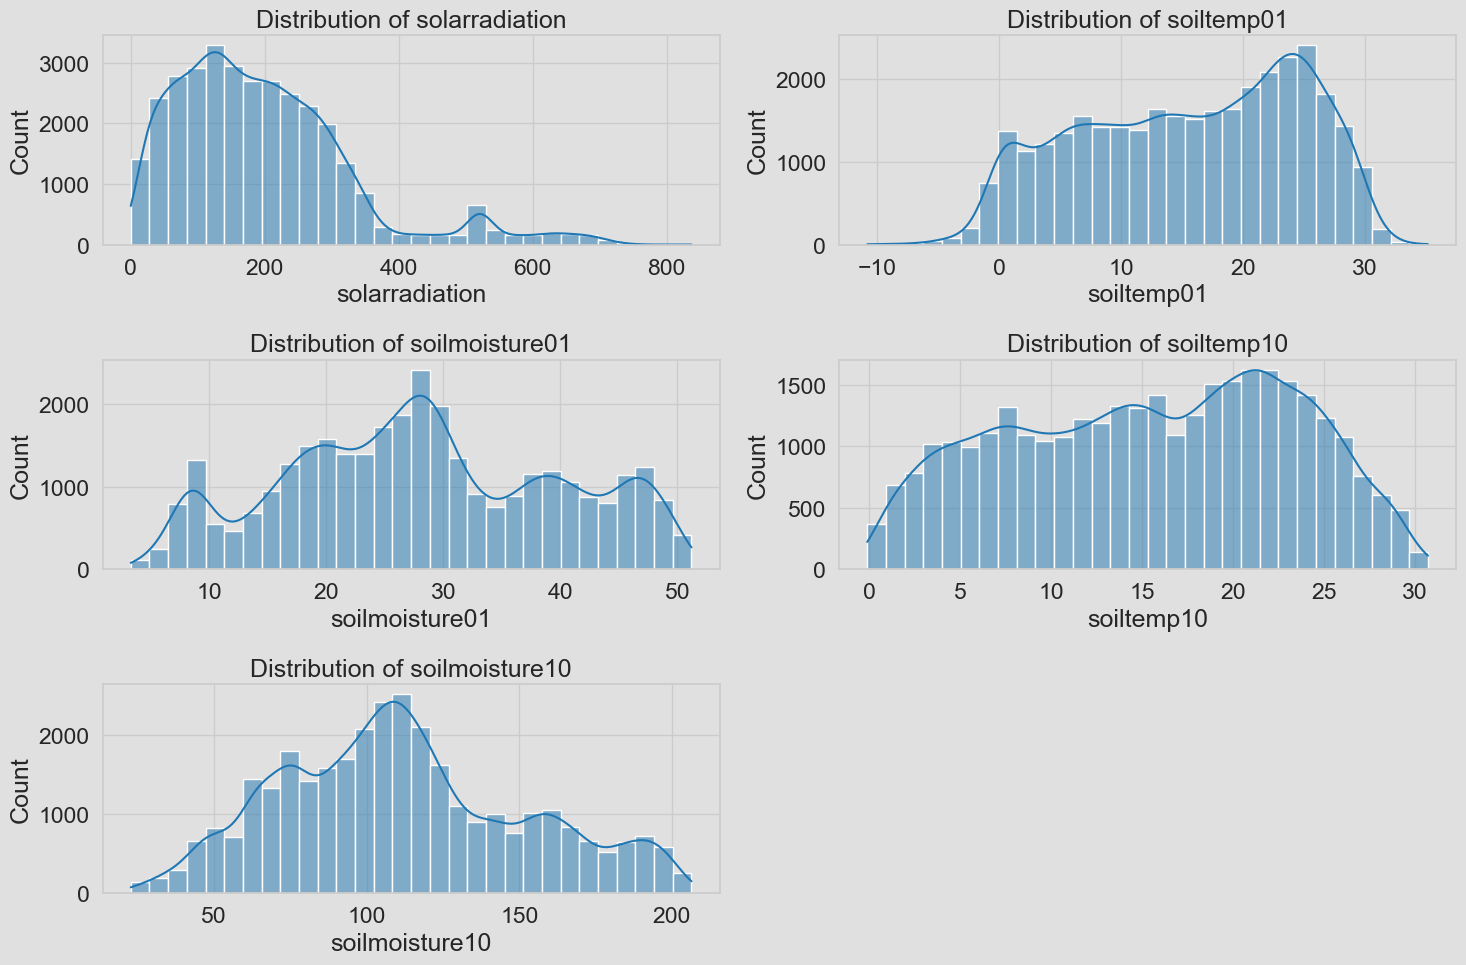

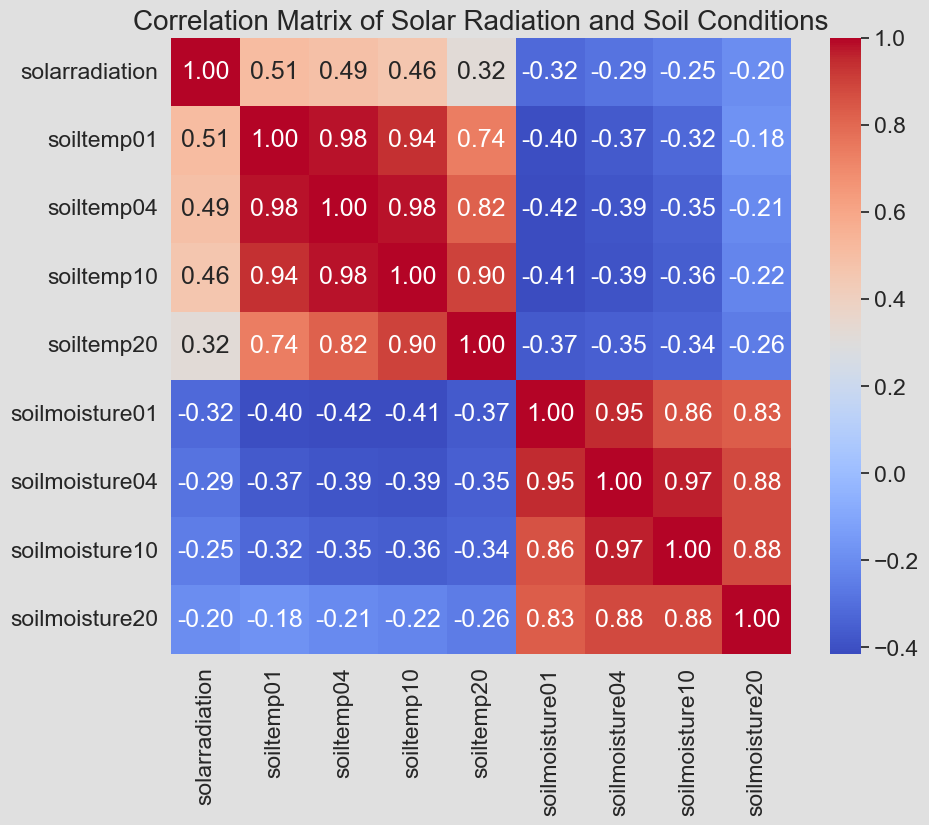

[codecarbon INFO @ 18:50:59] Energy consumed for RAM : 0.014635 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:50:59] Energy consumed for all GPUs : 0.041581 kWh. Total GPU Power : 15.675855815444995 W
[codecarbon INFO @ 18:50:59] Energy consumed for all CPUs : 0.057023 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:50:59] 0.113238 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:51:14] Energy consumed for RAM : 0.014659 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:51:14] Energy consumed for all GPUs : 0.041646 kWh. Total GPU Power : 15.812019284843906 W
[codecarbon INFO @ 18:51:14] Energy consumed for all CPUs : 0.057116 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:51:14] 0.113421 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:51:29] Energy consumed for RAM : 0.014683 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:51:29] Energy consumed for all GPUs : 0.041712 kWh. Total GPU Power : 15.862356660379

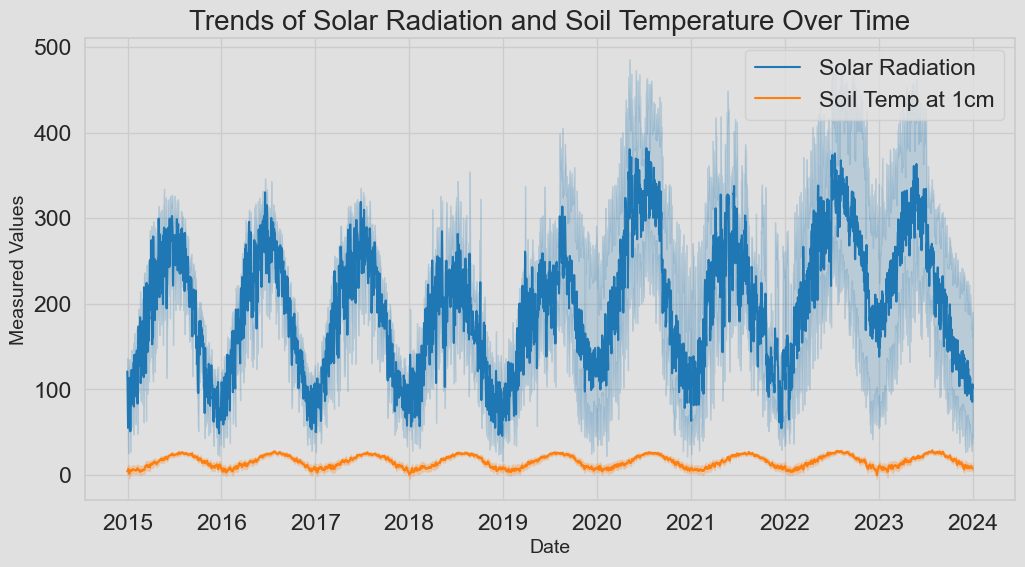

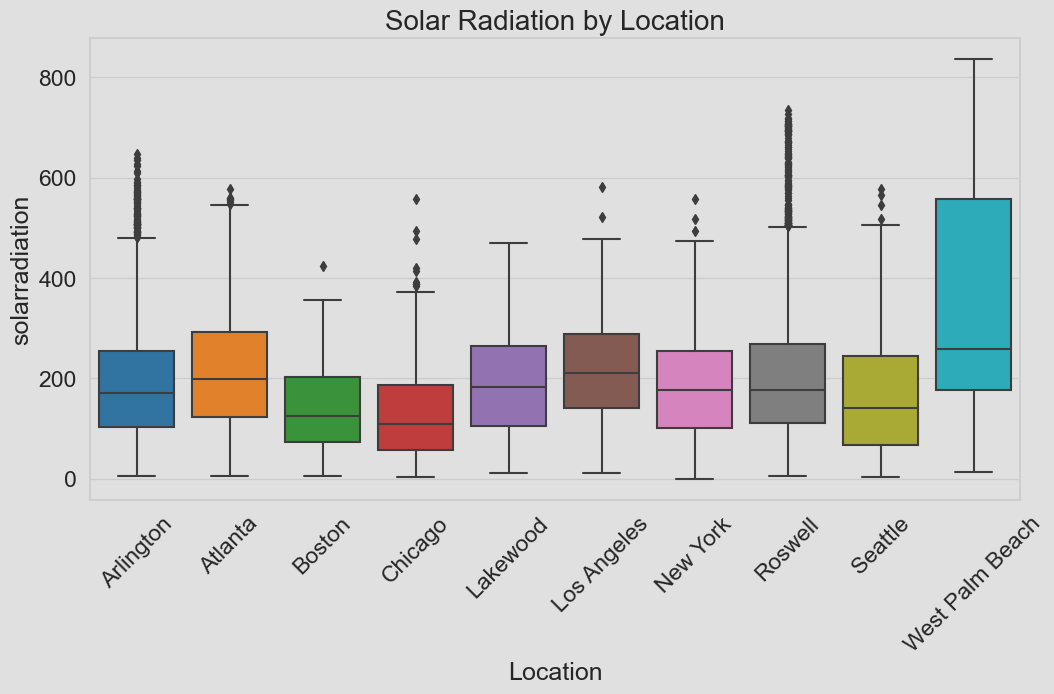

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid", {'axes.facecolor': '#E0E0E0', 'figure.facecolor': '#E0E0E0'})
sns.set_context("notebook", font_scale=1.5)  # Increase font scale for better readability

# Convert 'datetime' from string to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# 1. Visualize Distribution of Key Variables
variables_to_plot = ['solarradiation', 'soiltemp01', 'soilmoisture01', 'soiltemp10', 'soilmoisture10']
plt.figure(figsize=(15, 10), facecolor='#E0E0E0', edgecolor='#E0E0E0')
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}', fontsize=18)
plt.tight_layout()
plt.savefig('../image/distribution_of_key_variables.png', dpi=300)  # Save with high DPI
plt.show()

# 2. Correlation Analysis
correlation_vars = ['solarradiation', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']
correlation_matrix = df[correlation_vars].corr()
plt.figure(figsize=(10, 8), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Solar Radiation and Soil Conditions', fontsize=20)
plt.savefig('../image/correlation_matrix.png', dpi=300)  # Save with high DPI
plt.show()

# 3. Trend Analysis Over Time
plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.lineplot(x='datetime', y='solarradiation', data=df, label='Solar Radiation')
sns.lineplot(x='datetime', y='soiltemp01', data=df, label='Soil Temp at 1cm')
plt.title('Trends of Solar Radiation and Soil Temperature Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Measured Values', fontsize=14)
plt.legend()
plt.savefig('../image/trend_analysis_over_time.png', dpi=300)  # Save with high DPI
plt.show()

# 4. Comparative Analysis by Location
plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.boxplot(x='Location', y='solarradiation', data=df)
plt.xticks(rotation=45)
plt.title('Solar Radiation by Location', fontsize=20)
plt.savefig('../image/solar_radiation_by_location.png', dpi=300)  # Save with high DPI
plt.show()


# Modeling: Regression

First perpare the dataset and feature

In [301]:

from sklearn.model_selection import train_test_split

df['datetime'] = pd.to_datetime(df['datetime'])

# Select relevant features
features = ['solarradiation', 'solarenergy', 'ghiradiation', 'dniradiation', 'difradiation', 'gtiradiation']
targets = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)


Step 2: Building the Machine Learning Models:

Two models: a Random Forest regressor and a Gradient Boosting Machine model. 

These models will predict soil temperature and moisture.

When training the model, codecarbon is being used to check carbon cost of the model.

In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from codecarbon import EmissionsTracker

# carbon emissions tracker
tracker = EmissionsTracker()
tracker.start()

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Stop tracking 
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training RandomForest: {emissions} kg")

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')


[codecarbon INFO @ 18:52:20] [setup] RAM Tracking...
[codecarbon INFO @ 18:52:20] [setup] GPU Tracking...
[codecarbon INFO @ 18:52:20] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:52:20] [setup] CPU Tracking...
[codecarbon WARNING @ 18:52:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:52:21] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:21] >>> Tracker's metadata:
[codecarbon INFO @ 18:52:21]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:52:21]   Python version: 3.9.13
[codecarbon INFO @ 18:52:21]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:52:21]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:52:21]   CPU count: 16
[codecarbon INFO @ 18:52:21]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:21]   GPU count: 1
[codecarbon INFO @ 18:52:21]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:52:29] E

Estimated CO2 emissions for training RandomForest: 5.387022481346185e-05 kg
Random Forest MSE: 1363.8636969539036


Then, for gradient boost:

In here, I also use a wrapper called MultiOutputRegressor that enables single-target regressors like GradientBoostingRegressor to be used as multi-target regressors. 

In [303]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

tracker = EmissionsTracker()
tracker.start()

# Gradient Boosting 
gbm_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
gbm_model.fit(X_train, y_train)

# Stop tracking 
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training GBM: {emissions} kg")

gbm_predictions = gbm_model.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')


[codecarbon INFO @ 18:52:36] [setup] RAM Tracking...
[codecarbon INFO @ 18:52:36] [setup] GPU Tracking...
[codecarbon INFO @ 18:52:36] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:52:36] [setup] CPU Tracking...
[codecarbon WARNING @ 18:52:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:52:38] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:38] >>> Tracker's metadata:
[codecarbon INFO @ 18:52:38]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:52:38]   Python version: 3.9.13
[codecarbon INFO @ 18:52:38]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:52:38]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:52:38]   CPU count: 16
[codecarbon INFO @ 18:52:38]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:38]   GPU count: 1
[codecarbon INFO @ 18:52:38]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:52:44] E

Estimated CO2 emissions for training GBM: 7.922866041650303e-05 kg
Gradient Boosting MSE: 1353.2953213557662


After training, we use some evaluation matrices to compare:

In [305]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Random Forest Metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest MAE: {rf_mae}')

# Gradient Boosting Metrics
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')
print(f'Gradient Boosting RMSE: {gbm_rmse}')
print(f'Gradient Boosting MAE: {gbm_mae}')


Random Forest MSE: 1363.8636969539036
Random Forest RMSE: 36.930525273192416
Random Forest MAE: 19.019004749454922
Gradient Boosting MSE: 1353.2953213557662
Gradient Boosting RMSE: 36.7871624531679
Gradient Boosting MAE: 19.62670304865015


[codecarbon INFO @ 18:54:29] Energy consumed for RAM : 0.014971 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:54:29] Energy consumed for all GPUs : 0.042527 kWh. Total GPU Power : 15.385000101279681 W
[codecarbon INFO @ 18:54:29] Energy consumed for all CPUs : 0.058334 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:29] 0.115832 kWh of electricity used since the beginning.


Then, after the models are compared through RMSE, MSE, carbon cost.

It is important for us to draw some conclusions related to my topic.

Therefore, I create a feature importance and model performance plot for better understanding.

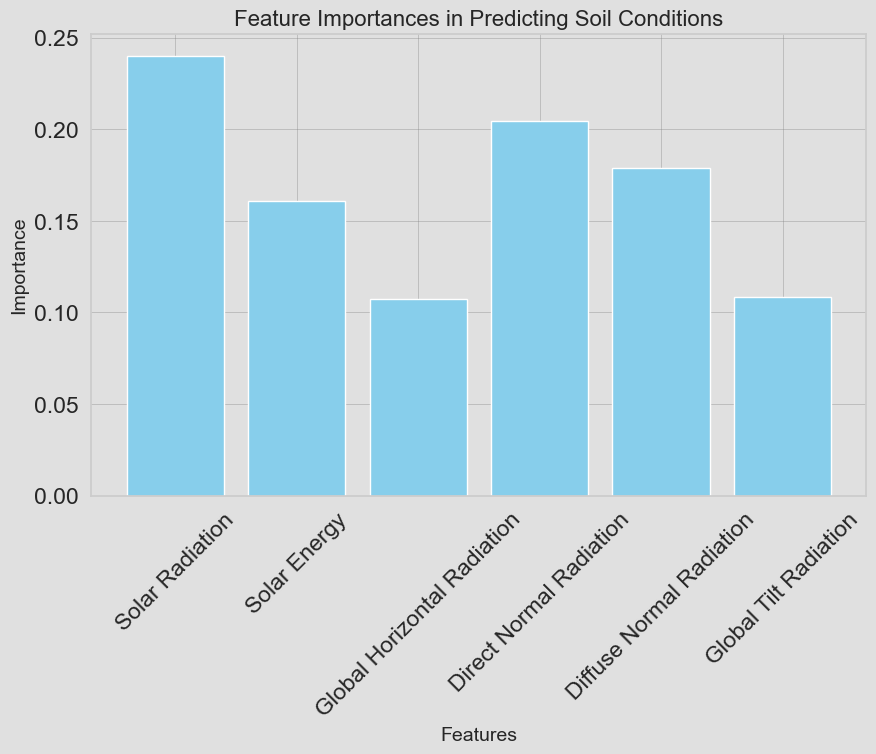

In [306]:

feature_importances = rf_model.feature_importances_
features = [
    'Solar Radiation', 'Solar Energy', 'Global Horizontal Radiation',
    'Direct Normal Radiation', 'Diffuse Normal Radiation', 'Global Tilt Radiation'
]

# Configure plot aesthetics
plt.figure(figsize=(10, 6), facecolor='#E0E0E0')  # Set figure background color
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features', fontsize=14)  # Larger font size for x label
plt.ylabel('Importance', fontsize=14)  # Larger font size for y label
plt.title('Feature Importances in Predicting Soil Conditions', fontsize=16)  # Larger title font
plt.xticks(rotation=45)
plt.gca().set_facecolor('#E0E0E0')  # Set axes background color

# Add a grid for better readability
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)  # Configure grid color and style

plt.savefig('../image/feature_importances.png', dpi=300, facecolor='#E0E0E0')  # Save with high DPI and specific background color
plt.show()


We have found that solar radiation and direct normal radiation are more important in predicting the soil conditions.

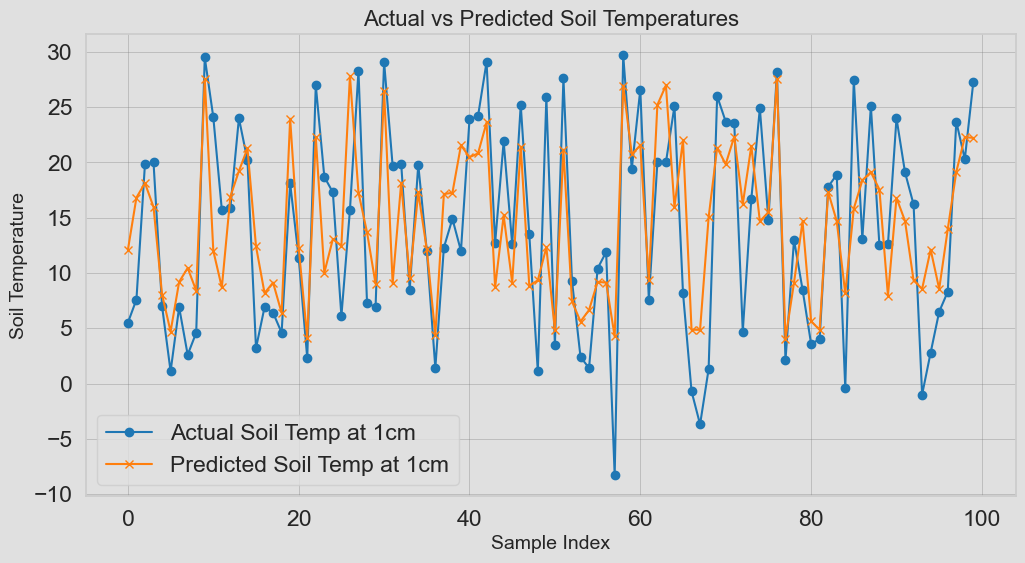

In [307]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), facecolor='#E0E0E0')  # Set figure background color
plt.plot(y_test.reset_index(drop=True).iloc[:100, 0], label='Actual Soil Temp at 1cm', marker='o')
plt.plot(gbm_predictions[:100, 0], label='Predicted Soil Temp at 1cm', marker='x')
plt.xlabel('Sample Index', fontsize=14)  # Larger font size for x label
plt.ylabel('Soil Temperature', fontsize=14)  # Larger font size for y label
plt.title('Actual vs Predicted Soil Temperatures', fontsize=16)  # Larger title font
plt.legend()

# Set axes background color
plt.gca().set_facecolor('#E0E0E0')


# Add a grid for better readability
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)  # Configure grid color and style

# Save the plot with high DPI and specific background color
plt.savefig('../image/actual_vs_predicted_soil_temps.png', dpi=300, facecolor='#E0E0E0')
plt.show()


The prediction is pretty effective

In [308]:
from sklearn.metrics import mean_squared_error

locations = df['Location'].unique()
mse_scores = {}
features = ['solarradiation', 'solarenergy', 'ghiradiation', 'dniradiation', 'difradiation', 'gtiradiation']
for location in locations:
    # Filter data by location
    location_data = df[df['Location'] == location]
    X_location = location_data[features]
    y_location = location_data[targets]

    # Split location-specific data
    X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_location, y_location, test_size=0.2, random_state=42)

    # Fit model (you can use an already tuned model or refit if necessary)
    rf_model.fit(X_train_loc, y_train_loc)
    predictions_loc = rf_model.predict(X_test_loc)

    # Calculate MSE for the location
    mse_scores[location] = mean_squared_error(y_test_loc, predictions_loc)


[codecarbon INFO @ 18:54:44] Energy consumed for RAM : 0.014995 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:54:44] Energy consumed for all GPUs : 0.042592 kWh. Total GPU Power : 15.779416145810131 W
[codecarbon INFO @ 18:54:44] Energy consumed for all CPUs : 0.058428 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:44] 0.116016 kWh of electricity used since the beginning.


[codecarbon INFO @ 18:54:59] Energy consumed for RAM : 0.015020 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:54:59] Energy consumed for all GPUs : 0.042660 kWh. Total GPU Power : 16.187116626613772 W
[codecarbon INFO @ 18:54:59] Energy consumed for all CPUs : 0.058521 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:55:00] 0.116201 kWh of electricity used since the beginning.


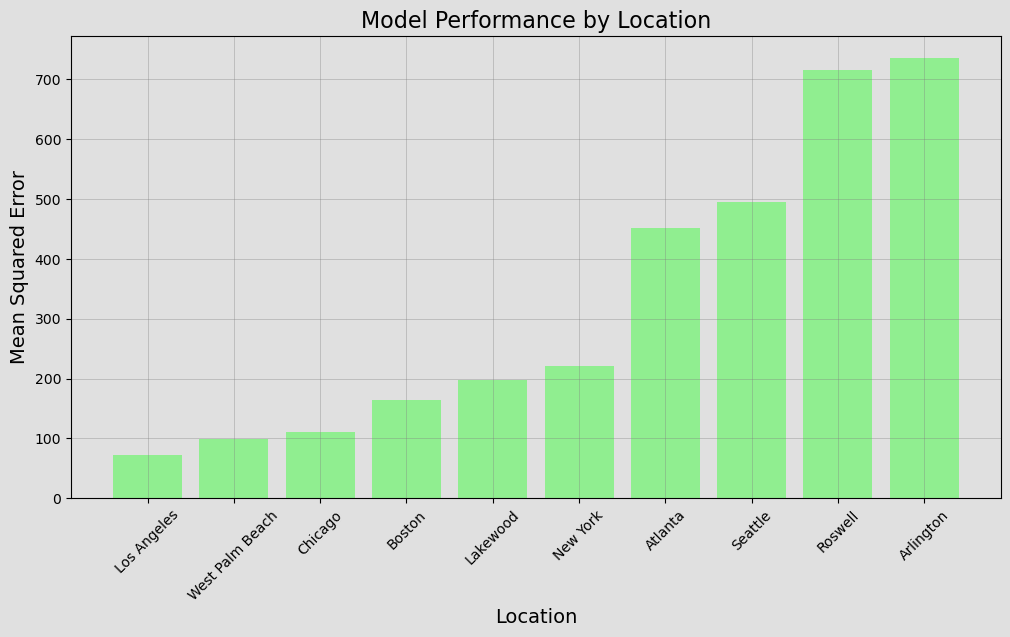

In [279]:
sorted_mse_scores = dict(sorted(mse_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')  # Set figure background and edge color
plt.bar(sorted_mse_scores.keys(), sorted_mse_scores.values(), color='lightgreen')
plt.xlabel('Location', fontsize=14)  # Larger font size for x label
plt.ylabel('Mean Squared Error', fontsize=14)  # Larger font size for y label
plt.title('Model Performance by Location', fontsize=16)  # Larger title font
plt.xticks(rotation=45)

# Set axes background color
plt.gca().set_facecolor('#E0E0E0')

# Add a grid 
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)  # Configure grid color and style

# Save the plot 
plt.savefig('../image/model_performance_by_location.png', dpi=300, facecolor='#E0E0E0')
plt.show()


In addition, we also found that the model performed the best for Los Angeles with the smallest MSE. On the contrary, model performance for Arlington and Roswell results in higher MSE.


# Models: Classification

After the regression modeling, I also want to do a classification for further understanding the relationship between solar power and soil condiction.

The models used are random forest classifier and logistic regression.

Step 1: Define the Classification Target

I create target based on high vs. low solar radiation, which could influence various factors in soil conditions. 

This is a binary target where days with solar radiation above the median are labeled 1 (high) and below the median as 0 (low).

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target 
median_solar_radiation = df['solarradiation'].median()
df['high_solar_radiation'] = (df['solarradiation'] >= median_solar_radiation).astype(int)

# Select features - consider location and other relevant environmental features
features = ['temp', 'humidity', 'precipcover', 'cloudcover', 'windspeed', 'sealevelpressure', 'Location']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encode categorical data
y = df['high_solar_radiation']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[codecarbon INFO @ 18:55:14] Energy consumed for RAM : 0.015044 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:55:14] Energy consumed for all GPUs : 0.042727 kWh. Total GPU Power : 16.136567747001713 W
[codecarbon INFO @ 18:55:14] Energy consumed for all CPUs : 0.058615 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:55:14] 0.116386 kWh of electricity used since the beginning.



Step 2: Train Model



The first one is the logistic regression.

Also keep tracking the carbon cost along with other evaluation methods.

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

tracker = EmissionsTracker()
tracker.start()

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Stop tracking 
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training Logistic Regression: {emissions} kg")

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate 
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(classification_report(y_test, lr_predictions))

# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print(f"Confusion Matrix for Logistic Regression:\n{lr_conf_matrix}")


[codecarbon INFO @ 18:55:16] [setup] RAM Tracking...
[codecarbon INFO @ 18:55:16] [setup] GPU Tracking...
[codecarbon INFO @ 18:55:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:55:16] [setup] CPU Tracking...
[codecarbon WARNING @ 18:55:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:55:18] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:18] >>> Tracker's metadata:
[codecarbon INFO @ 18:55:18]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:55:18]   Python version: 3.9.13
[codecarbon INFO @ 18:55:18]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:55:18]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:55:18]   CPU count: 16
[codecarbon INFO @ 18:55:18]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:18]   GPU count: 1
[codecarbon INFO @ 18:55:18]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:55:21] E

Estimated CO2 emissions for training Logistic Regression: 1.613785082668656e-06 kg
Logistic Regression Accuracy: 0.7725889869181625
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3335
           1       0.76      0.79      0.77      3239

    accuracy                           0.77      6574
   macro avg       0.77      0.77      0.77      6574
weighted avg       0.77      0.77      0.77      6574

Confusion Matrix for Logistic Regression:
[[2505  830]
 [ 665 2574]]


Then, similar process for random forest classifier.

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tracker = EmissionsTracker()
tracker.start()

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Stop tracking 
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training RandomForestClassifier: {emissions} kg")

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate 
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, rf_predictions))

# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print(f"Confusion Matrix for Random Forest:\n{rf_conf_matrix}")


[codecarbon INFO @ 18:55:25] [setup] RAM Tracking...
[codecarbon INFO @ 18:55:25] [setup] GPU Tracking...
[codecarbon INFO @ 18:55:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:55:25] [setup] CPU Tracking...
[codecarbon WARNING @ 18:55:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:55:27] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:27] >>> Tracker's metadata:
[codecarbon INFO @ 18:55:27]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:55:27]   Python version: 3.9.13
[codecarbon INFO @ 18:55:27]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:55:27]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:55:27]   CPU count: 16
[codecarbon INFO @ 18:55:27]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:27]   GPU count: 1
[codecarbon INFO @ 18:55:27]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:55:29] E

Estimated CO2 emissions for training RandomForestClassifier: 1.1778508975569944e-05 kg
Random Forest Accuracy: 0.7920596288408883
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3335
           1       0.79      0.78      0.79      3239

    accuracy                           0.79      6574
   macro avg       0.79      0.79      0.79      6574
weighted avg       0.79      0.79      0.79      6574

Confusion Matrix for Random Forest:
[[2667  668]
 [ 699 2540]]


Make viusliations for both confusion matrix 

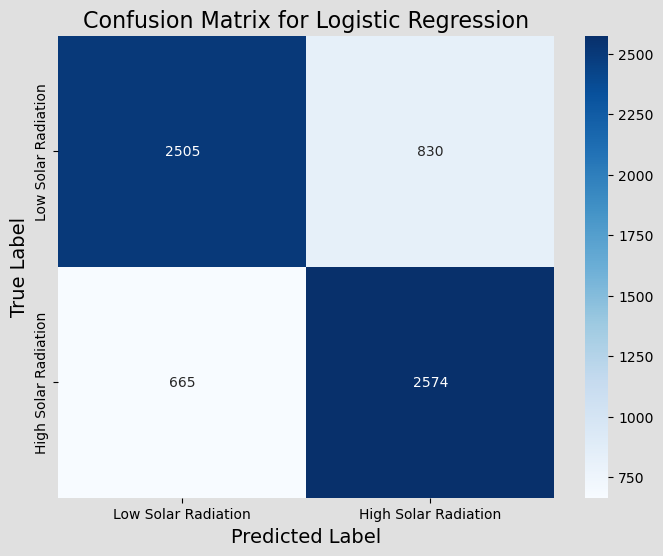

[codecarbon INFO @ 17:51:27] Energy consumed for RAM : 0.008906 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:51:27] Energy consumed for all GPUs : 0.025998 kWh. Total GPU Power : 15.866500428689264 W
[codecarbon INFO @ 17:51:27] Energy consumed for all CPUs : 0.034700 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:51:27] 0.069604 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:51:42] Energy consumed for RAM : 0.008930 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:51:42] Energy consumed for all GPUs : 0.026065 kWh. Total GPU Power : 15.927968015106039 W
[codecarbon INFO @ 17:51:42] Energy consumed for all CPUs : 0.034794 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:51:42] 0.069789 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:51:57] Energy consumed for RAM : 0.008954 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:51:57] Energy consumed for all GPUs : 0.026132 kWh. Total GPU Power : 16.171061025350

In [285]:
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(8, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')  # Set figure background and edge color
ax = sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Low Solar Radiation', 'High Solar Radiation'],
                 yticklabels=['Low Solar Radiation', 'High Solar Radiation'])
plt.xlabel('Predicted Label', fontsize=14)  # Larger font size for x label
plt.ylabel('True Label', fontsize=14)  # Larger font size for y label
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)  # Larger title font

# Set axes background color, but it won't affect heatmap
plt.gca().set_facecolor('#E0E0E0')

# Save the plot with high DPI and specific background color
plt.savefig('../image/logistic_regression_confusion_matrix.png', dpi=300, facecolor='#E0E0E0')
plt.show()


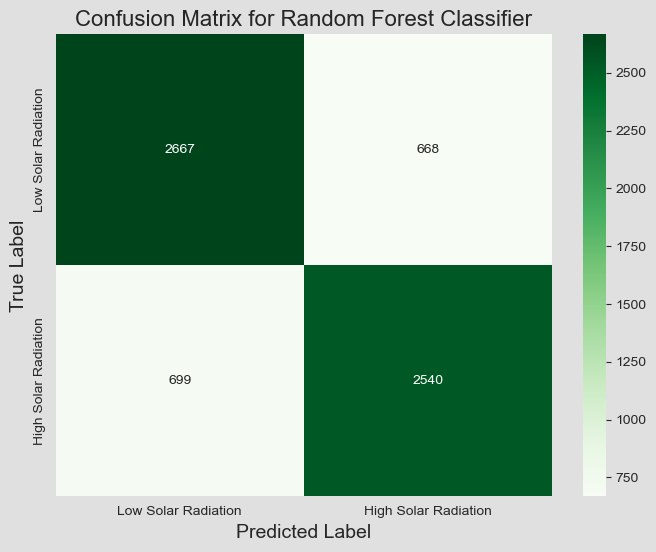

[codecarbon INFO @ 17:52:58] Energy consumed for RAM : 0.009050 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:52:58] Energy consumed for all GPUs : 0.026404 kWh. Total GPU Power : 16.206021925963118 W
[codecarbon INFO @ 17:52:58] Energy consumed for all CPUs : 0.035263 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:52:58] 0.070717 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:53:13] Energy consumed for RAM : 0.009074 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:53:13] Energy consumed for all GPUs : 0.026469 kWh. Total GPU Power : 15.685699687383277 W
[codecarbon INFO @ 17:53:13] Energy consumed for all CPUs : 0.035357 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:53:13] 0.070900 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:53:28] Energy consumed for RAM : 0.009098 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:53:28] Energy consumed for all GPUs : 0.026535 kWh. Total GPU Power : 15.643713525582

In [287]:
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')  # Set figure background and edge color
ax = sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens',
                 xticklabels=['Low Solar Radiation', 'High Solar Radiation'],
                 yticklabels=['Low Solar Radiation', 'High Solar Radiation'])
plt.xlabel('Predicted Label', fontsize=14)  # Larger font size for x label
plt.ylabel('True Label', fontsize=14)  # Larger font size for y label
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=16)  # Larger title font

# Set axes background color, but it won't affect heatmap
plt.gca().set_facecolor('#E0E0E0')

# Save the plot with high DPI and specific background color
plt.savefig('../image/random_forest_confusion_matrix.png', dpi=300, facecolor='#E0E0E0')
plt.show()


## The summary of the comparsion 

Estimated CO2 emissions for training RandomForestClassifier: 6.7945618182298664e-06 kg

Random Forest Accuracy: 0.7920596288408883

Estimated CO2 emissions for training Logistic Regression: 7.585821643039916e-07 kg

Logistic Regression Accuracy: 0.7725889869181625

THen, visulize the carbon cost of the models

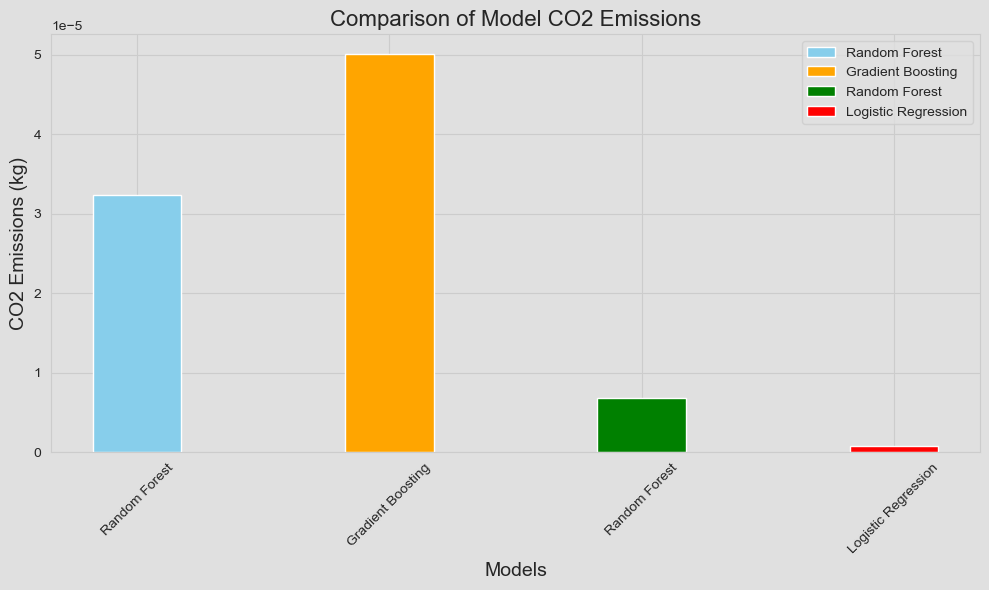

[codecarbon INFO @ 17:56:43] Energy consumed for RAM : 0.009411 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:56:43] Energy consumed for all GPUs : 0.027381 kWh. Total GPU Power : 15.936535125190547 W
[codecarbon INFO @ 17:56:43] Energy consumed for all CPUs : 0.036670 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:56:43] 0.073462 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:56:58] Energy consumed for RAM : 0.009435 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:56:58] Energy consumed for all GPUs : 0.027451 kWh. Total GPU Power : 16.771708920231436 W
[codecarbon INFO @ 17:56:58] Energy consumed for all CPUs : 0.036764 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:56:58] 0.073650 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:57:13] Energy consumed for RAM : 0.009459 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:57:13] Energy consumed for all GPUs : 0.027517 kWh. Total GPU Power : 15.783136054156

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Applying a seaborn style for consistency
sns.set_style("whitegrid", {'axes.facecolor': '#E0E0E0'})

# Data preparation
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Random Forest', 'Logistic Regression'],
    'CO2 Emissions (kg)': [3.2406912654573566e-05, 5.006796183344451e-05, 6.7945618182298664e-06, 7.585821643039916e-07]
}

dft = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#E0E0E0')  # Set the outer background color
fig.patch.set_edgecolor('#E0E0E0')  # Set the edge color

# Bars configuration
colors = ['skyblue', 'orange', 'green', 'red']  # Add more colors if necessary
width = 0.35  # Width of the bars

# Plotting bars
for i, (model, emissions) in enumerate(zip(dft['Model'], dft['CO2 Emissions (kg)'])):
    ax.bar(i, emissions, width, label=model, color=colors[i % len(colors)])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('CO2 Emissions (kg)', fontsize=14)
ax.set_title('Comparison of Model CO2 Emissions', fontsize=16)
ax.set_xticks(np.arange(len(dft)))
ax.set_xticklabels(dft['Model'], rotation=45)
ax.legend()

# Setting axes background color
ax.set_facecolor('#E0E0E0')

fig.tight_layout()
plt.savefig('../image/cmco2.png', dpi=300, facecolor='#E0E0E0')
plt.show()


Model Performance Summary:

Accuracy:

Random Forest: Achieved an accuracy of approximately 79.21%. This indicates a relatively high level of accuracy in classifying days as high or low solar radiation based on given features.

Logistic Regression: Showed slightly lower accuracy at about 77.26%. This suggests that while effective, it may not capture complex patterns as well as Random Forest.


Both Random Forest and Logistic Regression are effective classifiers for this problem, with Random Forest slightly outperforming Logistic Regression in most metrics.

Given its higher accuracy and balanced error metrics, Random Forest might be the preferred model for tasks requiring robust error handling and complex pattern recognition.


# Predictions of Crop Yield
## ARIMA and Deep Learning Models


Now, for prediction concerning the crop production, we load the dataset seperately.

The IY111 consist of two columns: date and the price idex concerning the crop production.



In [ ]:

import pandas as pd

# Load the CSV file
df = pd.read_csv('../dataset/IY111.csv')

print(df.head())


         DATE  IY111
0  2005-12-01  100.0
1  2006-01-01  101.7
2  2006-02-01  100.1
3  2006-03-01   99.9
4  2006-04-01   99.8


[codecarbon INFO @ 18:55:45] Energy consumed for RAM : 0.015092 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:55:45] Energy consumed for all GPUs : 0.042875 kWh. Total GPU Power : 16.394935908711386 W
[codecarbon INFO @ 18:55:45] Energy consumed for all CPUs : 0.058803 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:55:45] 0.116769 kWh of electricity used since the beginning.


In [313]:
# Clean the dataset by setting up the column type
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


A brief overview about the dataset

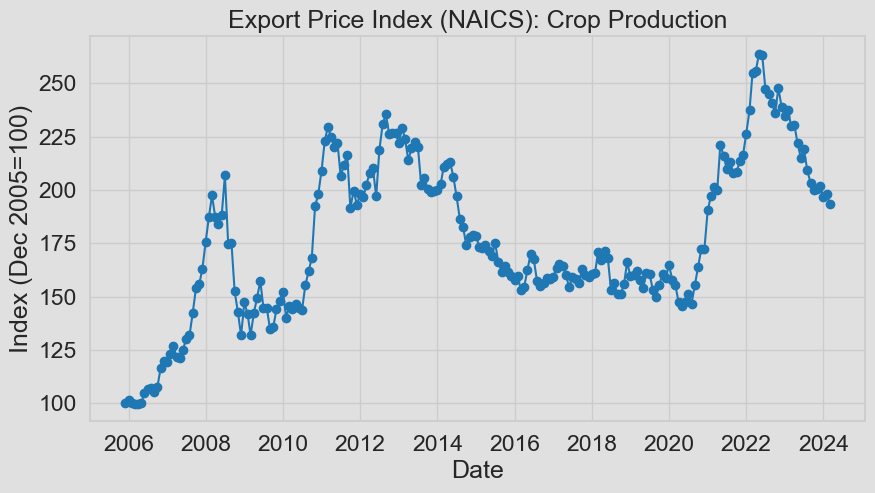

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['IY111'], marker='o', linestyle='-')
plt.title('Export Price Index (NAICS): Crop Production')
plt.xlabel('Date')
plt.ylabel('Index (Dec 2005=100)')
plt.grid(True)
plt.savefig('../image/cp.png')
plt.show()


Stationarity Check:

Most time series forecasting methods, including ARIMA, require the data to be stationary. 

In [315]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['IY111'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.8508735104358633
p-value: 0.051366251861330134


we can see that the p-value is about 0.05, we can assume the series is stationary. We can differenciate the series to make it certainly stationary.

Identifying ARIMA Parameters with ACF and PACF

Autocorrelation and partial autocorrelation plots help in identifying the potential parameters for the ARIMA model:

ACF: Helps to identify the q.
PACF: Helps to identify the p.


c:\Users\yzh20\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


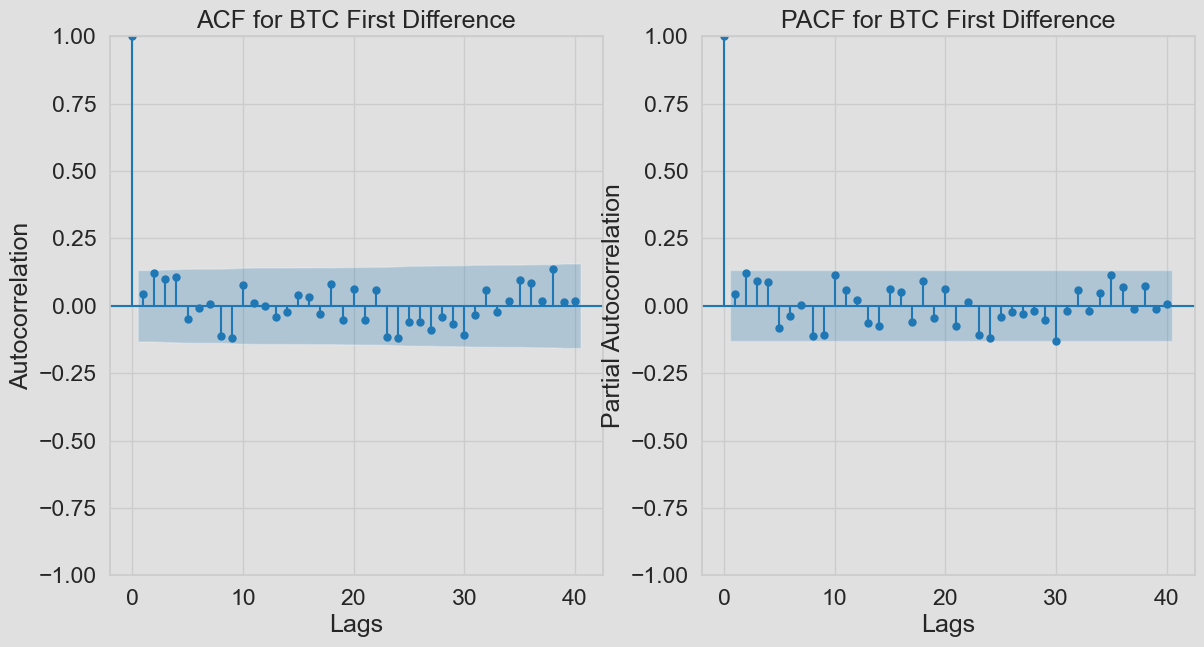

In [317]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


btc_first_difference = df['IY111'].diff().dropna()

# Plot ACF
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(btc_first_difference, ax=plt.gca(), lags=40, title='ACF for BTC First Difference')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# Plot PACF
plt.subplot(122)
plot_pacf(btc_first_difference, ax=plt.gca(), lags=40, title='PACF for BTC First Difference')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

plt.show()

Prepare for modeling

In [145]:
!pip install pmdarima

Modeling - ARIMA


[codecarbon INFO @ 18:56:06] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:06] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:06] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:08] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:08] >>> Tracker's metadata:
[codecarbon INFO @ 18:56:08]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:56:08]   Python version: 3.9.13
[codecarbon INFO @ 18:56:08]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:56:08]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:56:08]   CPU count: 16
[codecarbon INFO @ 18:56:08]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:08]   GPU count: 1
[codecarbon INFO @ 18:56:08]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
c:\Users\yzh20\Miniconda3\lib\

Estimated CO2 emissions for training ARIMA model: 8.66923176004224e-07 kg
                               SARIMAX Results                                
Dep. Variable:                  IY111   No. Observations:                  220
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -754.498
Date:                Sat, 20 Apr 2024   AIC                           1516.996
Time:                        18:56:11   BIC                           1530.552
Sample:                    12-01-2005   HQIC                          1522.471
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6075      0.231      2.628      0.009       0.154       1.061
ma.L1         -0.5903      0.237     -2.490      0.013   

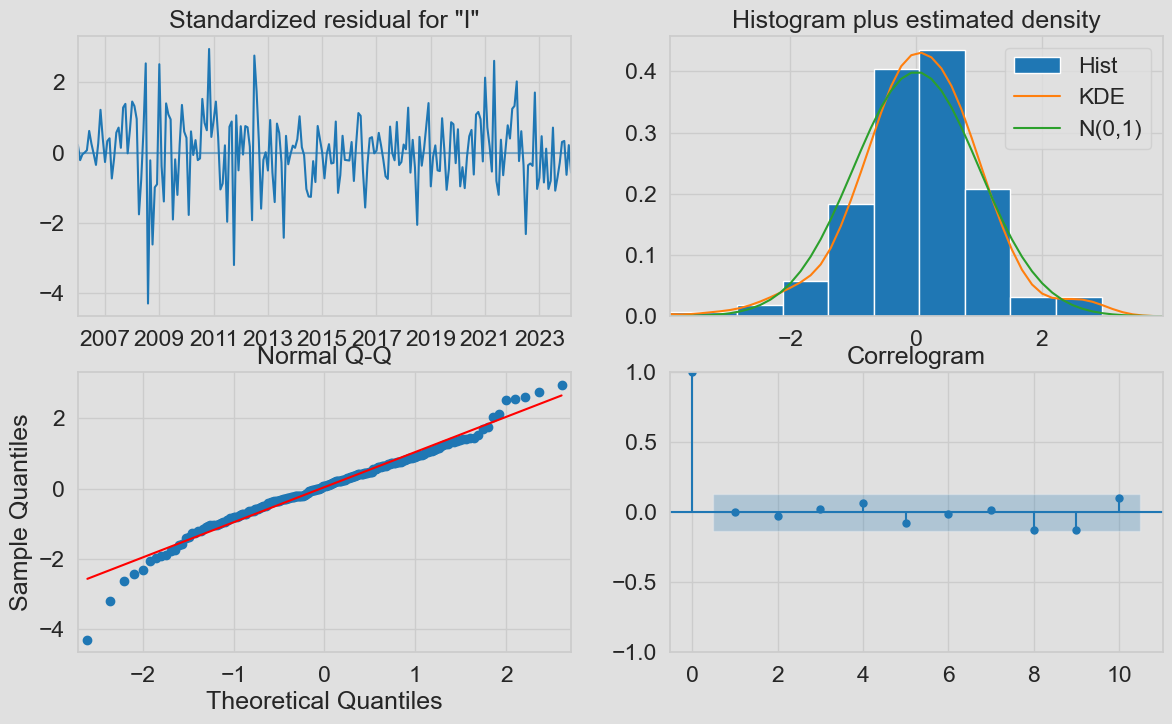

[codecarbon INFO @ 18:56:15] Energy consumed for RAM : 0.015140 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:56:15] Energy consumed for all GPUs : 0.043017 kWh. Total GPU Power : 18.132141193271494 W
[codecarbon INFO @ 18:56:15] Energy consumed for all CPUs : 0.058990 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:56:15] 0.117148 kWh of electricity used since the beginning.


In [318]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from codecarbon import EmissionsTracker


tracker = EmissionsTracker()
tracker.start()

# Initial model based on ACF and PACF
model = ARIMA(df['IY111'], order=(1, 1, 2))  
results = model.fit()


emissions = tracker.stop()
print(f"Estimated CO2 emissions for training ARIMA model: {emissions} kg")

# Summarize the model results
print(results.summary())

# Diagnostics plots
results.plot_diagnostics(figsize=(14, 8))
plt.show()


Standardized Residuals  shows the standardized residuals over time around zero without clear patterns, which is a good sign.

Histogram plus Estimated Density compares the distribution of the standardized residuals to a normal distribution. 

Normal Q-Q is consistent with the histogram, showing proper normal distribution.



## Benchmarking

Compare the arima with other benchmarking methods

[codecarbon INFO @ 18:56:17] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:17] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:17] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:17] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:19] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:19] >>> Tracker's metadata:
[codecarbon INFO @ 18:56:19]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:56:19]   Python version: 3.9.13
[codecarbon INFO @ 18:56:19]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:56:19]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:56:19]   CPU count: 16
[codecarbon INFO @ 18:56:19]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:19]   GPU count: 1
[codecarbon INFO @ 18:56:19]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
c:\Users\yzh20\Miniconda3\lib\

Estimated CO2 emissions for training and forecasting with ARIMA model: 1.973323160143068e-07 kg


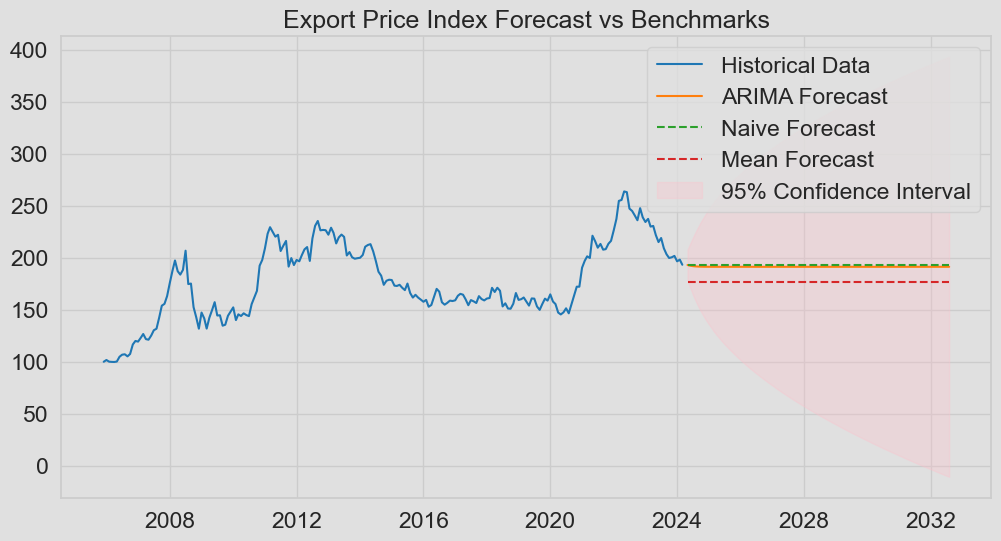

In [319]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


tracker = EmissionsTracker()
tracker.start()

# Fit the ARIMA model
model = ARIMA(df['IY111'], order=(1, 1, 2))
results = model.fit()

# Forecast
n_periods = 100
forecast_results = results.get_forecast(steps=n_periods)
forecast = forecast_results.predicted_mean
stderr = forecast_results.se_mean
conf_int = forecast_results.conf_int()


emissions = tracker.stop()
print(f"Estimated CO2 emissions for training and forecasting with ARIMA model: {emissions} kg")

# Create naive and mean forecasts for comparison
naive_forecast = np.full(n_periods, df['IY111'].iloc[-1])
mean_forecast = np.full(n_periods, df['IY111'].mean())

# Dates for plotting forecasts
forecast_dates = pd.date_range(df.index[-1], periods=n_periods + 1, freq='M')[1:]

# Plot the historical data, forecast, and benchmarks
plt.figure(figsize=(12, 6))
plt.plot(df['IY111'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='ARIMA Forecast')
plt.plot(forecast_dates, naive_forecast, label='Naive Forecast', linestyle='--')
plt.plot(forecast_dates, mean_forecast, label='Mean Forecast', linestyle='--')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Export Price Index Forecast vs Benchmarks')
plt.legend()
plt.show()


We can see that the arima model did not perform well. No major differentce from the benchmarking methods. Therefore, I think that arima model is not effective in this case.

# Deep Learning Methods

Now, Compare LSTM, RNN, and GRU.

In [323]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras import regularizers

# Setting seeds for reproducibility
random.seed(236)
np.random.seed(236)
tf.random.set_seed(236)

[codecarbon INFO @ 18:56:45] Energy consumed for RAM : 0.015188 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:56:45] Energy consumed for all GPUs : 0.043167 kWh. Total GPU Power : 16.967053671688593 W
[codecarbon INFO @ 18:56:45] Energy consumed for all CPUs : 0.059178 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:56:45] 0.117533 kWh of electricity used since the beginning.


Same dataset

In [324]:
df = pd.read_csv("../dataset/IY111.csv")

clean and prepare with renameing and creating x and y

In [326]:
df = df.rename(columns={"IY111": "y"}) # The objective
df = df[["DATE", "y"]]
X = np.array(df["y"].values.astype("float32")).reshape(df.shape[0], 1)

In [327]:
# Train and Test Split & Normalization

def train_test_split(data, split_percent=0.8):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
   
    split = int(n * split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


train_data, test_data, data = train_test_split(X)

print("train shape:", train_data.shape)
print("test shape:", test_data.shape)

train shape: (176,)
test shape: (44,)


Brief overview of the dataset

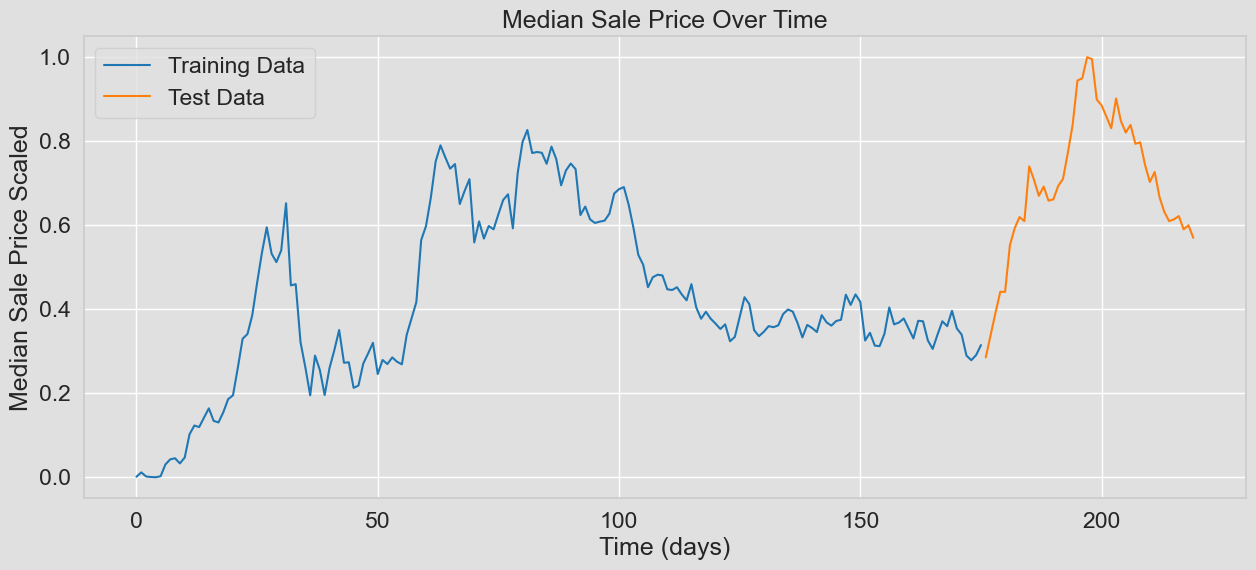

In [328]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=100)  # Set the size and DPI of the figure
fig.patch.set_facecolor('#E0E0E0')  # Set the background color for the outer figure
ax.set_facecolor('#E0E0E0')  # Set the background color for the axes

# Plot the training data
ax.plot(range(0, len(train_data)), train_data, "-", label="Training Data")

# Plot the test data
ax.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, "-", label="Test Data")

# labels and title
ax.set(xlabel="Time (days)", ylabel="Median Sale Price Scaled", title="Median Sale Price Over Time")

# Add grid 
ax.grid(color='white')
ax.legend()

# Show the plot
plt.show()


Prepare x and y

In [329]:
# X AND TARGET Y
def get_XY(dat, time_steps, plot_data_partition=False):
    global X_ind, X, Y_ind, Y  # use for plotting later

    Y_ind = np.arange(time_steps, len(dat), time_steps)

    Y = dat[Y_ind]

    #  X
    rows_x = len(Y)
    X_ind = [*range(time_steps * rows_x)]
    del X_ind[::time_steps]  # if time_steps=10 remove every 10th entry
    X = dat[X_ind]

    # PLOT
    if plot_data_partition:
        plt.figure(figsize=(15, 6), dpi=80)
        plt.plot(Y_ind, Y, "o", X_ind, X, "-")
        plt.show()

    # RESHAPE 
    X1 = np.reshape(X, (rows_x, time_steps - 1, 1))

    return X1, Y


# PARTITION DATA
p = 30  #
testX, testY = get_XY(test_data, p)
trainX, trainY = get_XY(train_data, p)

[codecarbon INFO @ 18:57:00] Energy consumed for RAM : 0.015212 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:00] Energy consumed for all GPUs : 0.043236 kWh. Total GPU Power : 16.541936432649138 W
[codecarbon INFO @ 18:57:00] Energy consumed for all CPUs : 0.059272 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:00] 0.117720 kWh of electricity used since the beginning.


Prepare for training by seeting up parameters

In [330]:
 #USER PARAM
recurrent_hidden_units = 3
epochs = 200
f_batch = 0.2  # fraction used for batch size
optimizer = "RMSprop"
validation_split = 0.2
# trainY=trainY.reshape(trainY.shape[0],1)
# testY=testY.reshape(testY.shape[0],1)
print("Testing Array Shape:", testX.shape, testY.shape)
print("Training Array Shape:", trainX.shape, trainY.shape)

Testing Array Shape: (1, 29, 1) (1,)
Training Array Shape: (5, 29, 1) (5,)


## Model Training:

LSTM

[codecarbon INFO @ 18:57:04] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:04] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:04] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:04] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:06] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:57:06] >>> Tracker's metadata:
[codecarbon INFO @ 18:57:06]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:57:06]   Python version: 3.9.13
[codecarbon INFO @ 18:57:06]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:57:06]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:57:06]   CPU count: 16
[codecarbon INFO @ 18:57:06]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:57:06]   GPU count: 1
[codecarbon INFO @ 18:57:06]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3)                 60        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


[codecarbon INFO @ 18:57:15] Energy consumed for RAM : 0.015236 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:15] Energy consumed for all GPUs : 0.043309 kWh. Total GPU Power : 17.58999272755751 W
[codecarbon INFO @ 18:57:15] Energy consumed for all CPUs : 0.059366 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:15] 0.117911 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:57:20] Energy consumed for RAM : 0.000018 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:20] Energy consumed for all GPUs : 0.000055 kWh. Total GPU Power : 17.408753307051633 W
[codecarbon INFO @ 18:57:20] Energy consumed for all CPUs : 0.000071 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:20] 0.000144 kWh of electricity used since the beginning.


Estimated CO2 emissions for training the LSTM model: 5.3317272404635156e-05 kg
1/1 [==============================] - 0s 12ms/step


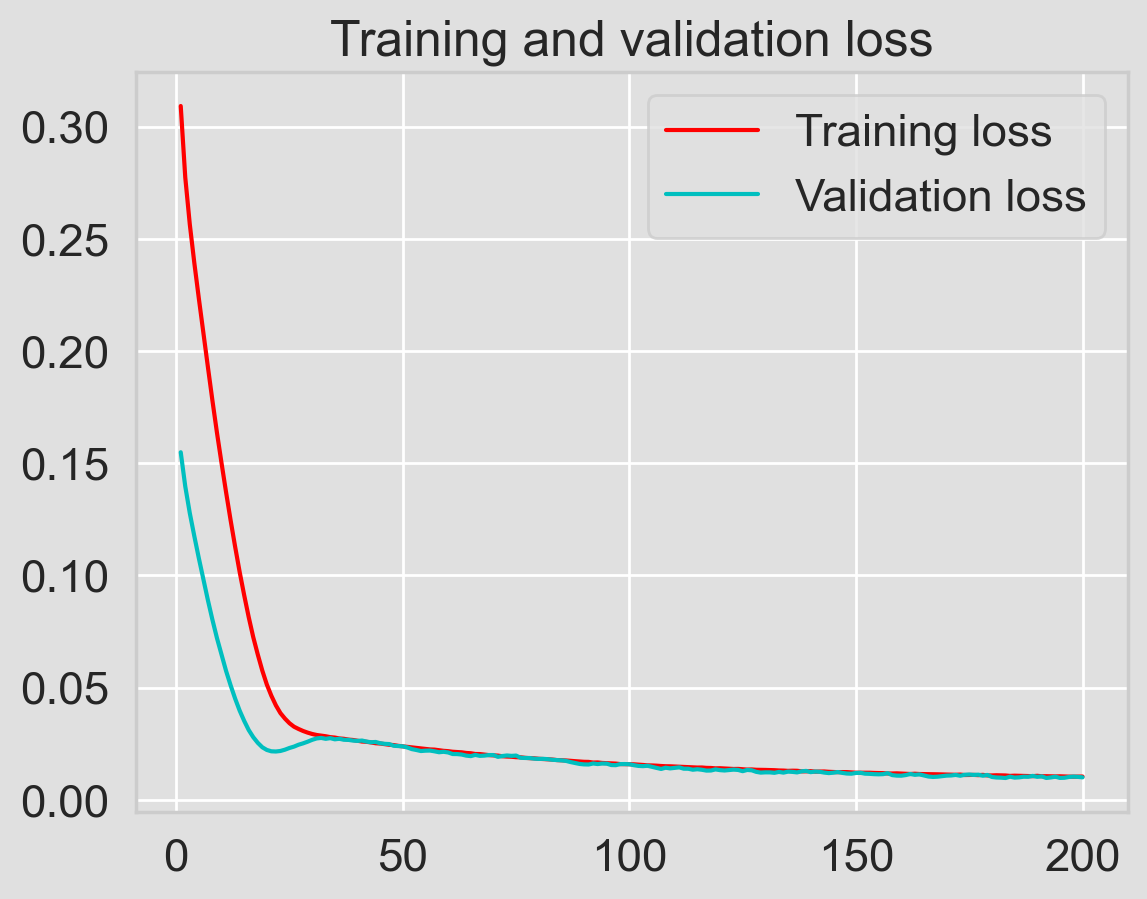

In [331]:
random.seed(236)

tracker = EmissionsTracker()
tracker.start()

# CREATE MODEL
model = Sequential()
model.add(
    LSTM(
        recurrent_hidden_units,
        return_sequences=False,
        input_shape=(trainX.shape[1], trainX.shape[2]),
        recurrent_regularizer=regularizers.L2(1e-2),
        activation="tanh",
    )
)

# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR
model.add(Dense(units=1, activation="linear"))

# COMPILE THE MODEL
model.compile(loss="MeanSquaredError", optimizer=optimizer)
model.summary()

# TRAIN MODEL
history = model.fit(
    trainX,
    trainY,
    epochs=200,
    batch_size=int(f_batch * trainX.shape[0]),
    validation_split=validation_split,
    verbose=0,
)


emissions = tracker.stop()
print(f"Estimated CO2 emissions for training the LSTM model: {emissions} kg")

# Make Prediction
train_predict = model.predict(trainX).squeeze()
test_predict = model.predict(testX).squeeze()

# Plotting the Training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(facecolor='#E0E0E0', dpi=200) 
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.gca().set_facecolor('#E0E0E0')  
plt.grid(color='white')  
plt.show()


LSTM Evaluation results

In [190]:
# Make predictions
train_predict = model.predict(trainX).flatten()
test_predict = model.predict(testX).flatten()  # Flattening to ensure it is a 1D array

# Now, print the shapes to verify
print("Shape of test_predict after flattening:", test_predict.shape)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = np.sqrt(mean_squared_error(testY, test_predict))

# Print MSE and RMSE
print("Train MSE = %.5f RMSE = %.5f" % (np.mean((trainY - train_predict) ** 2.0), train_rmse))
print("Test MSE = %.5f RMSE = %.5f" % (np.mean((testY - test_predict) ** 2.0), test_rmse))


1/1 [==============================] - 0s 16ms/step
Shape of test_predict after flattening: (1,)
Train MSE = 0.00788 RMSE = 0.08876
Test MSE = 0.01182 RMSE = 0.10870


(145,) (5,)


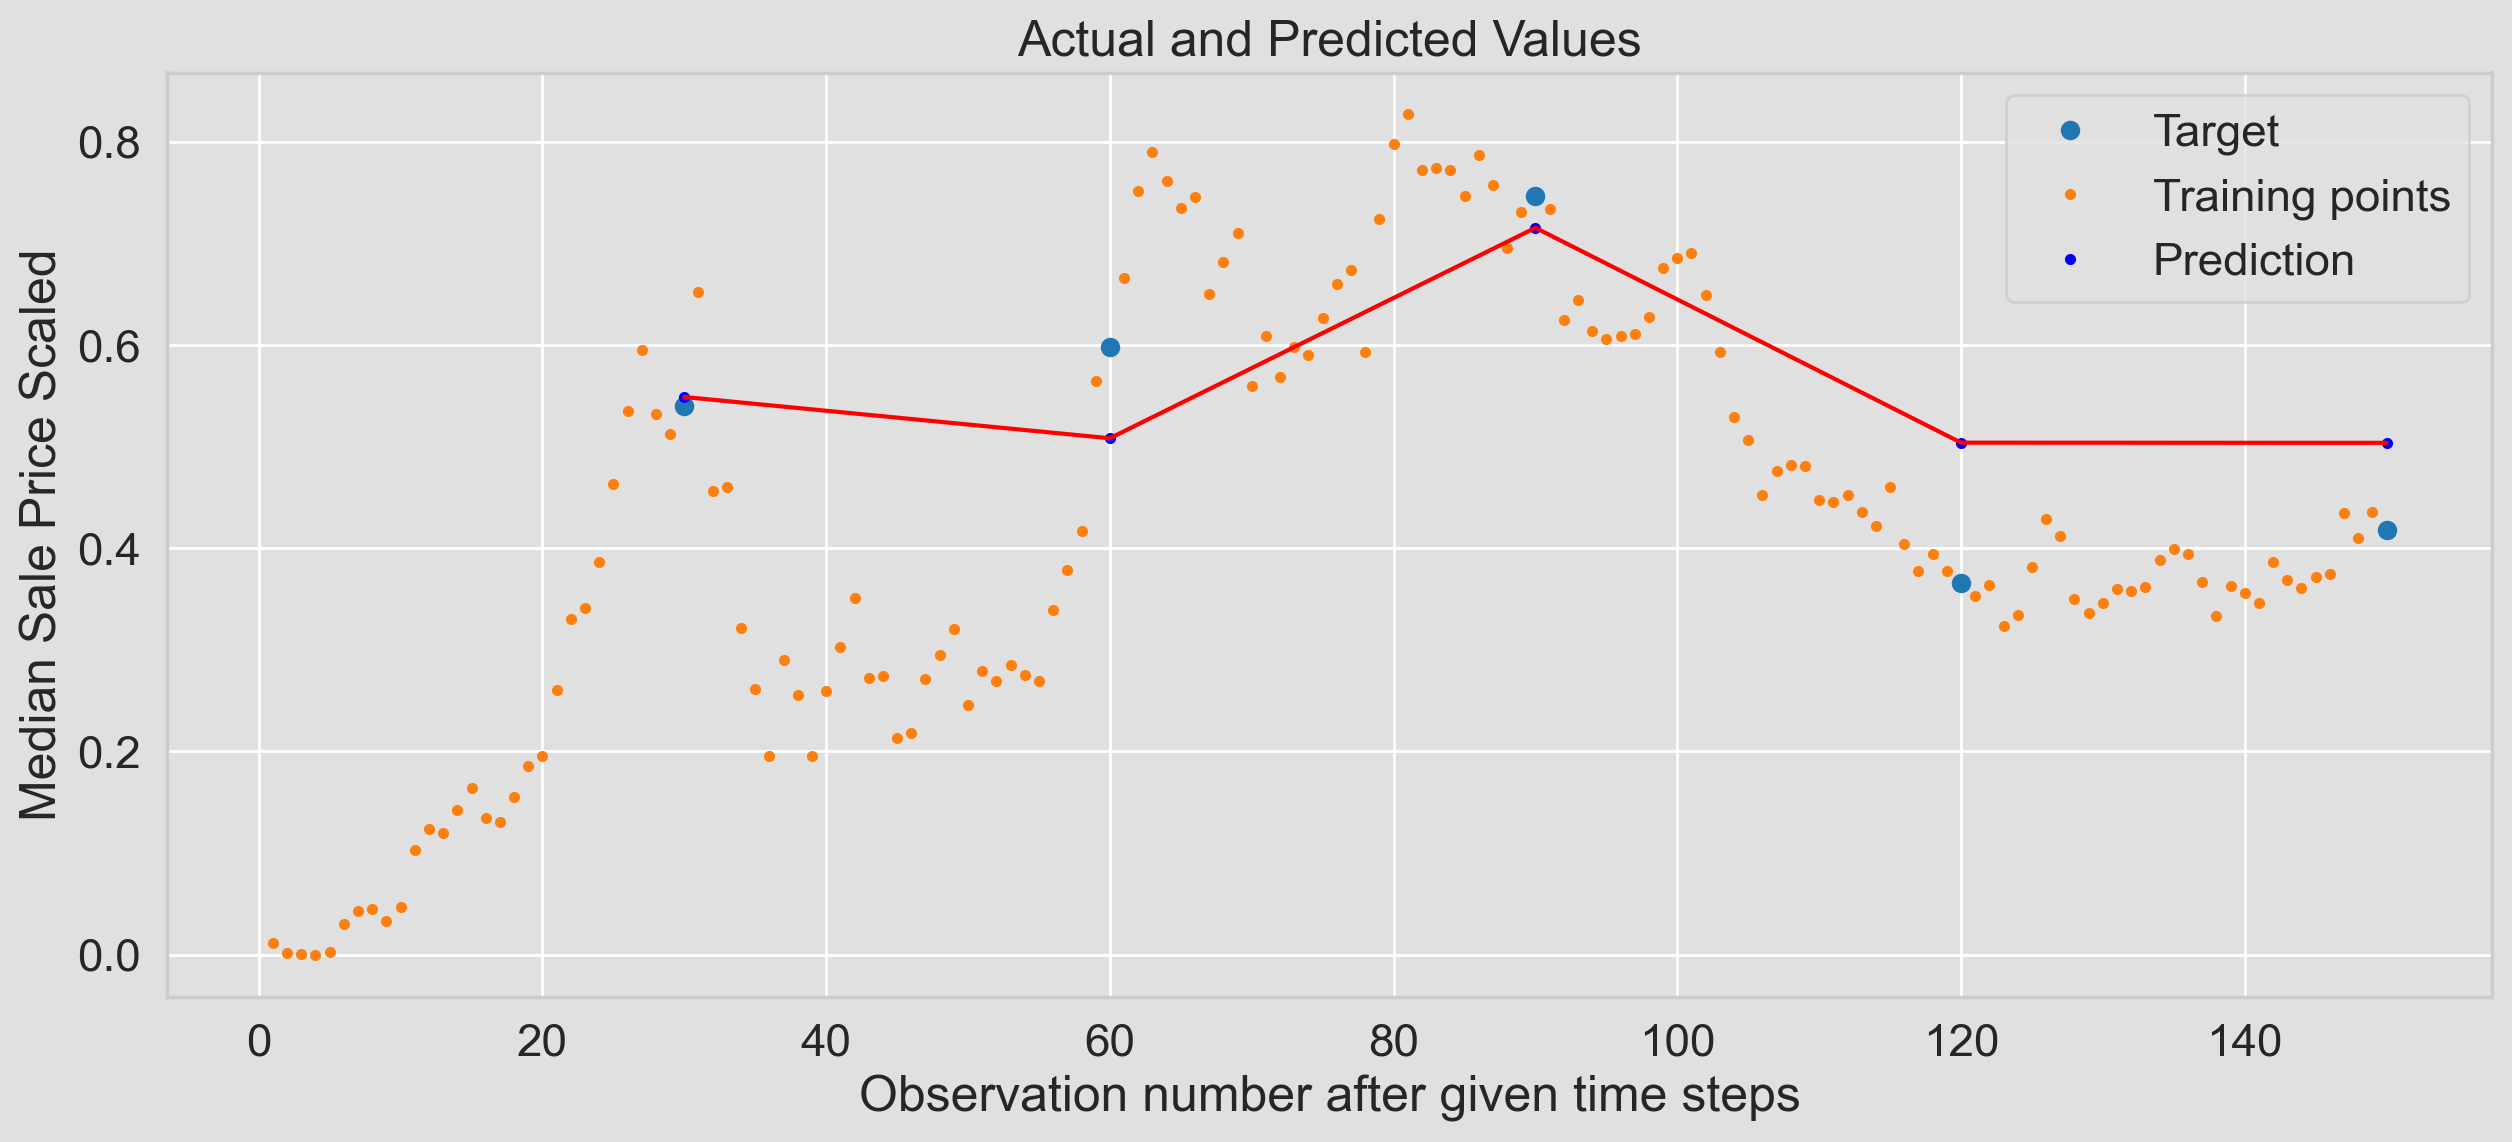

[codecarbon INFO @ 18:57:30] Energy consumed for RAM : 0.015260 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:30] Energy consumed for all GPUs : 0.043378 kWh. Total GPU Power : 16.579715163067693 W
[codecarbon INFO @ 18:57:30] Energy consumed for all CPUs : 0.059459 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:30] 0.118098 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:57:45] Energy consumed for RAM : 0.015284 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:45] Energy consumed for all GPUs : 0.043446 kWh. Total GPU Power : 16.136771659945158 W
[codecarbon INFO @ 18:57:45] Energy consumed for all CPUs : 0.059553 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:45] 0.118283 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:58:00] Energy consumed for RAM : 0.015308 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:58:00] Energy consumed for all GPUs : 0.043511 kWh. Total GPU Power : 15.744847057680

In [332]:

def plot_result(trainY, testY, train_predict, test_predict):
    plt.figure(figsize=(15, 6), dpi=200, facecolor='#E0E0E0')  # Set higher DPI and background color for the figure
    plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
    # ORIGINAL DATA
    print(X.shape, Y.shape)
    plt.plot(Y_ind, Y, "o", label="Target")
    plt.plot(X_ind, X, ".", label="Training points")
    plt.plot(Y_ind, train_predict, "b.", label="Prediction")
    plt.plot(Y_ind, train_predict, "r-")
    plt.legend()
    plt.xlabel("Observation number after given time steps")
    plt.ylabel("Median Sale Price Scaled")
    plt.title("Actual and Predicted Values")
    plt.grid(color='white')  # Set grid color to white for better visibility
    plt.show()


plot_result(trainY, testY, train_predict, test_predict)

## Model Training: RNN

Similar process

[codecarbon INFO @ 16:20:49] [setup] RAM Tracking...
[codecarbon INFO @ 16:20:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:20:49] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:20:49] [setup] CPU Tracking...
[codecarbon WARNING @ 16:20:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:20:50] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:20:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:20:50]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 16:20:50]   Python version: 3.9.13
[codecarbon INFO @ 16:20:50]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 16:20:50]   Available RAM : 15.405 GB
[codecarbon INFO @ 16:20:50]   CPU count: 16
[codecarbon INFO @ 16:20:50]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:20:50]   GPU count: 1
[codecarbon INFO @ 16:20:50]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


[codecarbon INFO @ 16:20:55] Energy consumed for RAM : 0.000193 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:20:55] Energy consumed for all GPUs : 0.000536 kWh. Total GPU Power : 18.378541040681476 W
[codecarbon INFO @ 16:20:55] Energy consumed for all CPUs : 0.000750 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:20:55] 0.001479 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:01] Energy consumed for RAM : 0.000013 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:01] Energy consumed for all GPUs : 0.000037 kWh. Total GPU Power : 16.701556820437514 W
[codecarbon INFO @ 16:21:01] Energy consumed for all CPUs : 0.000049 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:01] 0.000099 kWh of electricity used since the beginning.


Estimated CO2 emissions for training the RNN model: 2.080604616043634e-05 kg
1/1 [==============================] - 0s 22ms/step


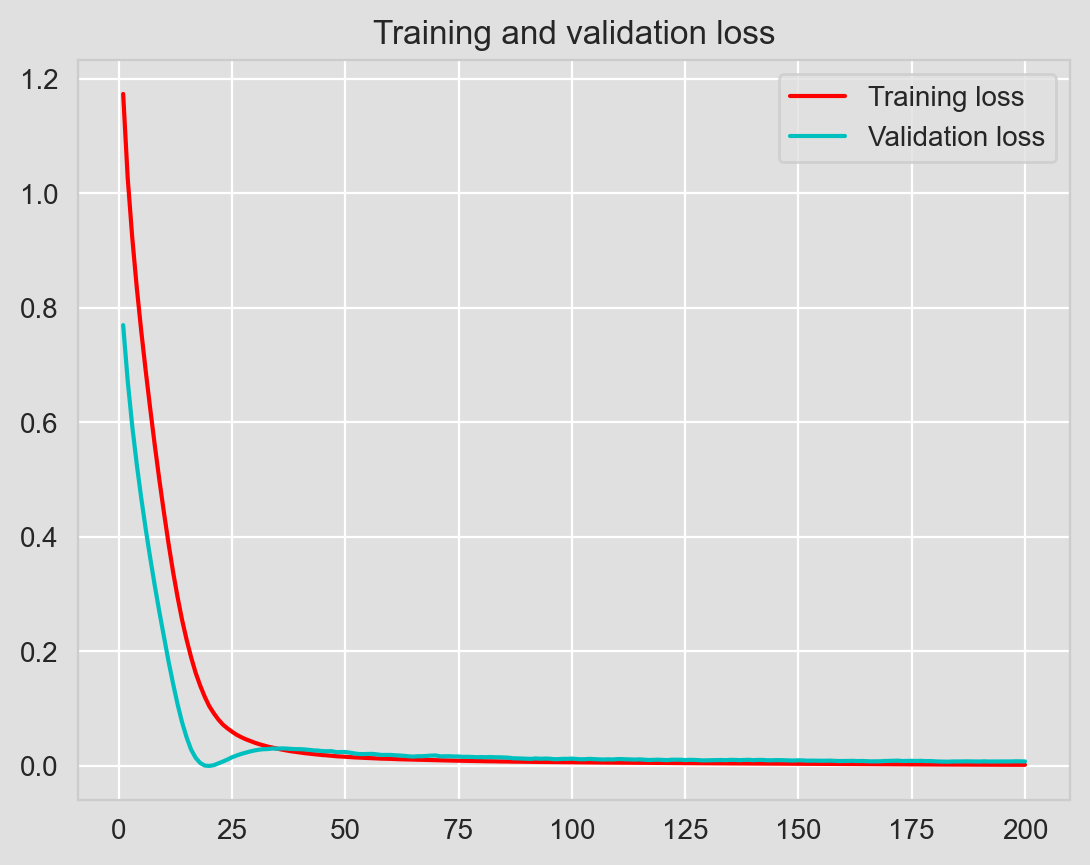

1/1 [==============================] - 0s 25ms/step
Shape of test_predict after flattening: (1,)
Train MSE = 0.00300 RMSE = 0.05475
Test MSE = 0.00914 RMSE = 0.09561
(145,) (5,)


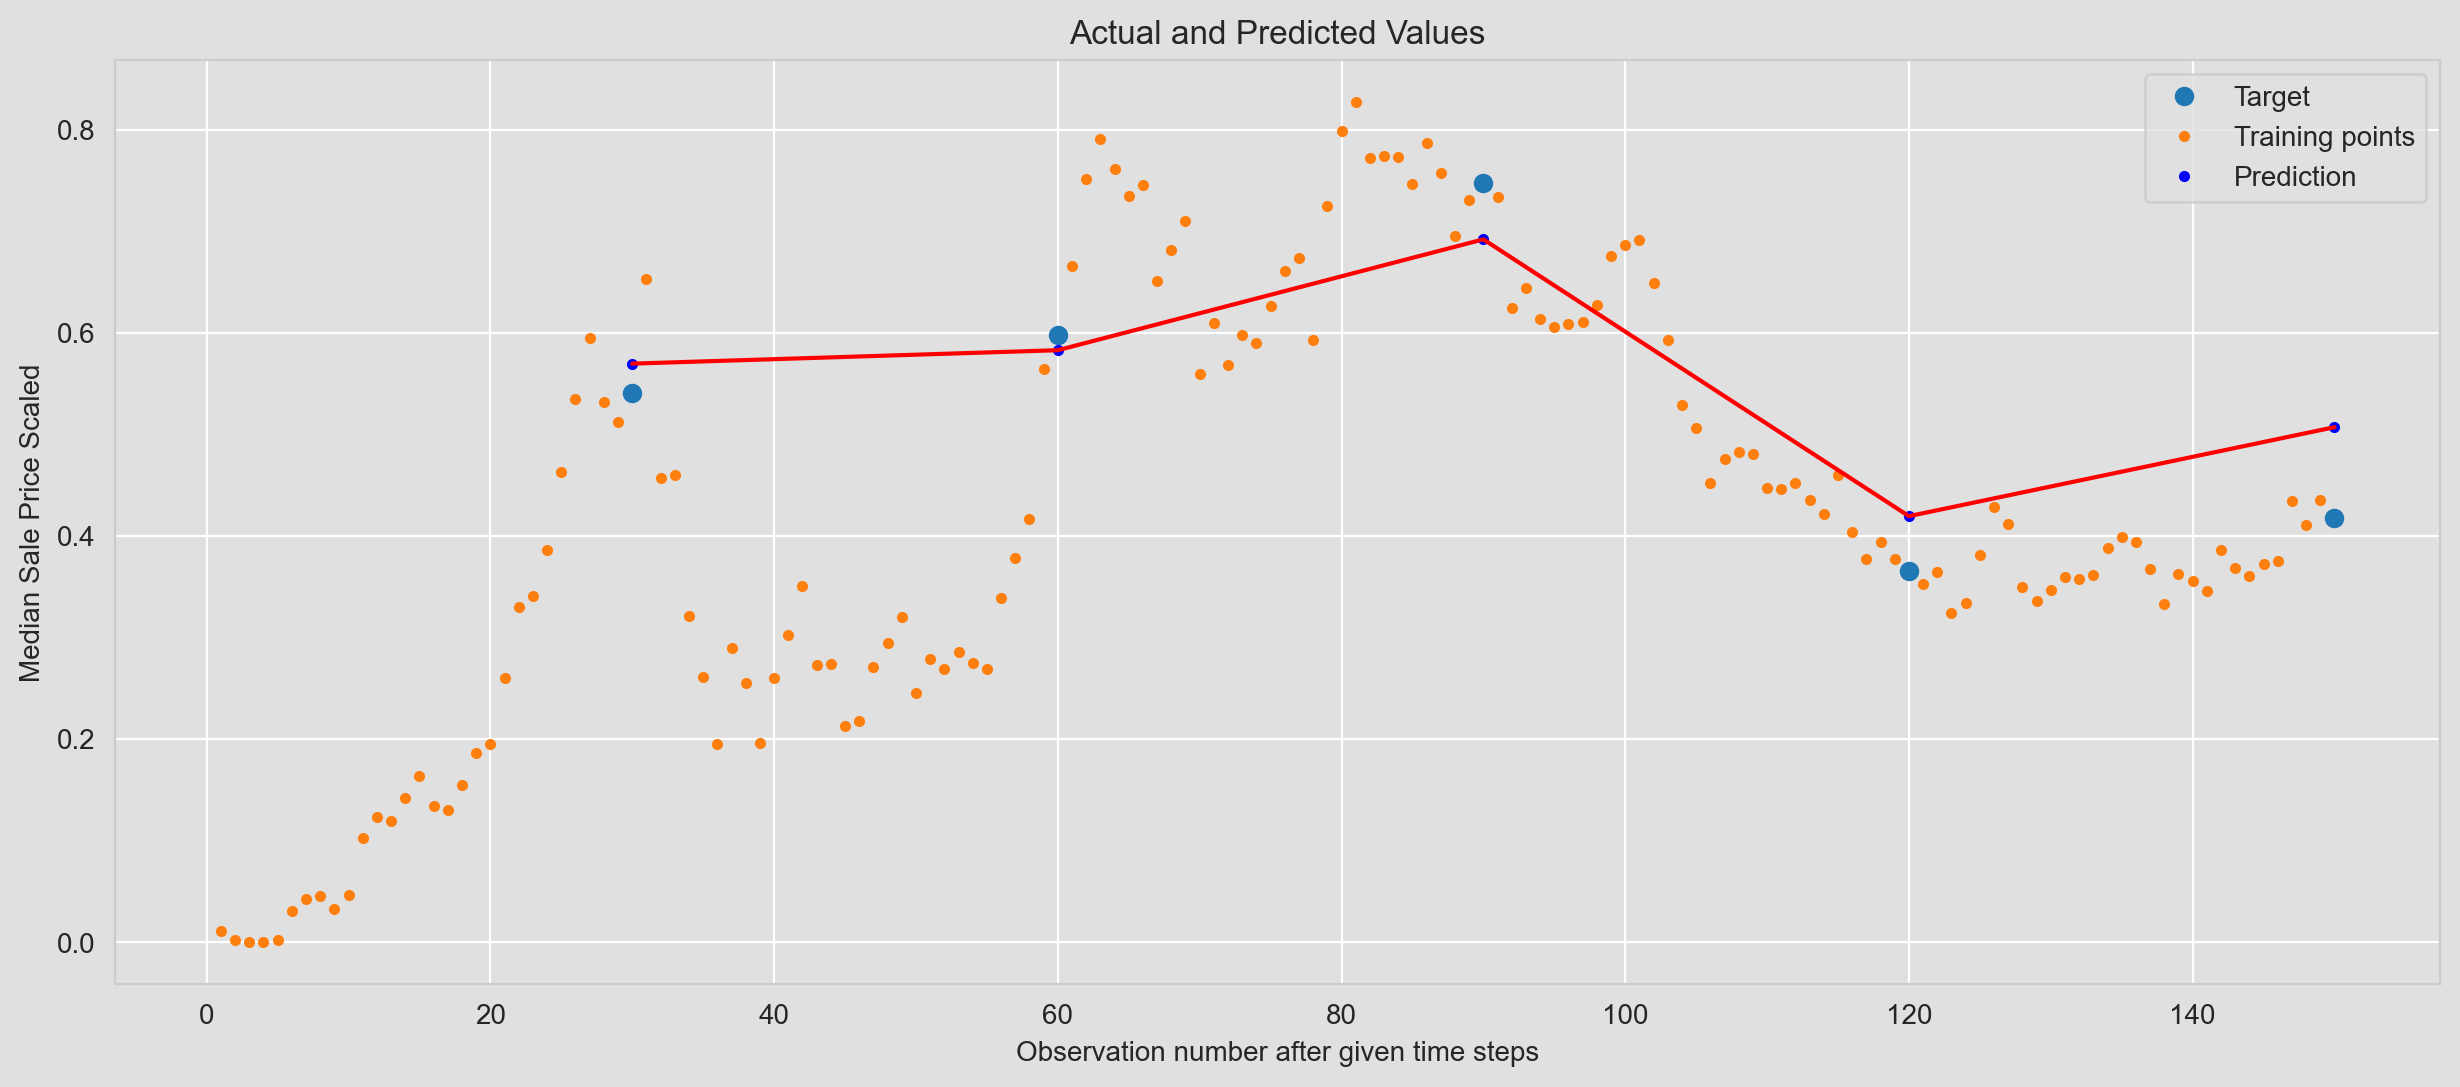

[codecarbon INFO @ 16:21:10] Energy consumed for RAM : 0.000217 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:10] Energy consumed for all GPUs : 0.000604 kWh. Total GPU Power : 16.488034954819792 W
[codecarbon INFO @ 16:21:10] Energy consumed for all CPUs : 0.000844 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:10] 0.001665 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:25] Energy consumed for RAM : 0.000241 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:25] Energy consumed for all GPUs : 0.000668 kWh. Total GPU Power : 15.359535148673103 W
[codecarbon INFO @ 16:21:25] Energy consumed for all CPUs : 0.000938 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:25] 0.001847 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:40] Energy consumed for RAM : 0.000265 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:40] Energy consumed for all GPUs : 0.000736 kWh. Total GPU Power : 16.188681933596

In [195]:
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU

np.random.seed(236)
tf.random.set_seed(236)

tracker = EmissionsTracker()
tracker.start()

model = Sequential()

model.add(
    SimpleRNN(
        recurrent_hidden_units,
        return_sequences=False,
        input_shape=(trainX.shape[1], trainX.shape[2]),
     
        activation="tanh",
    )
)


model.add(Dense(units=1, activation="linear"))

# COMPILE THE MODEL
model.compile(loss="MeanSquaredError", optimizer=optimizer)
model.summary()
history = model.fit(
    trainX,
    trainY,
    epochs=200,
    batch_size=int(f_batch * trainX.shape[0]),
    validation_split=validation_split,
    verbose=0,
)
# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training the RNN model: {emissions} kg")
# Evaluations
train_predict = model.predict(trainX).squeeze()
test_predict = model.predict(testX).squeeze()


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(facecolor='#E0E0E0', dpi=200)  # Set the background color and DPI
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
plt.grid(color='white')  # Set the grid color to white for better visibility on the gray background
plt.show()


# Make predictions
train_predict = model.predict(trainX).flatten()
test_predict = model.predict(testX).flatten()  # Flattening to ensure it is a 1D array

# Now, print the shapes to verify
print("Shape of test_predict after flattening:", test_predict.shape)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = np.sqrt(mean_squared_error(testY, test_predict))

# Print MSE and RMSE
print("Train MSE = %.5f RMSE = %.5f" % (np.mean((trainY - train_predict) ** 2.0), train_rmse))
print("Test MSE = %.5f RMSE = %.5f" % (np.mean((testY - test_predict) ** 2.0), test_rmse))


plot_result(trainY, testY, train_predict, test_predict)


## Model Training: GRU

Similar Process

[codecarbon INFO @ 16:22:46] [setup] RAM Tracking...
[codecarbon INFO @ 16:22:46] [setup] GPU Tracking...
[codecarbon INFO @ 16:22:46] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:22:46] [setup] CPU Tracking...
[codecarbon WARNING @ 16:22:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:22:48] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:22:48] >>> Tracker's metadata:
[codecarbon INFO @ 16:22:48]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 16:22:48]   Python version: 3.9.13
[codecarbon INFO @ 16:22:48]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 16:22:48]   Available RAM : 15.405 GB
[codecarbon INFO @ 16:22:48]   CPU count: 16
[codecarbon INFO @ 16:22:48]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:22:48]   GPU count: 1
[codecarbon INFO @ 16:22:48]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3)                 54        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


[codecarbon INFO @ 16:22:55] Energy consumed for RAM : 0.000385 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:22:55] Energy consumed for all GPUs : 0.001074 kWh. Total GPU Power : 17.37016352002242 W
[codecarbon INFO @ 16:22:55] Energy consumed for all CPUs : 0.001501 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:22:55] 0.002960 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:02] Energy consumed for RAM : 0.000019 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:02] Energy consumed for all GPUs : 0.000057 kWh. Total GPU Power : 17.717272807584273 W
[codecarbon INFO @ 16:23:02] Energy consumed for all CPUs : 0.000073 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:02] 0.000148 kWh of electricity used since the beginning.


Estimated CO2 emissions for training the GRU model: 3.1232980250948726e-05 kg
1/1 [==============================] - 0s 24ms/step


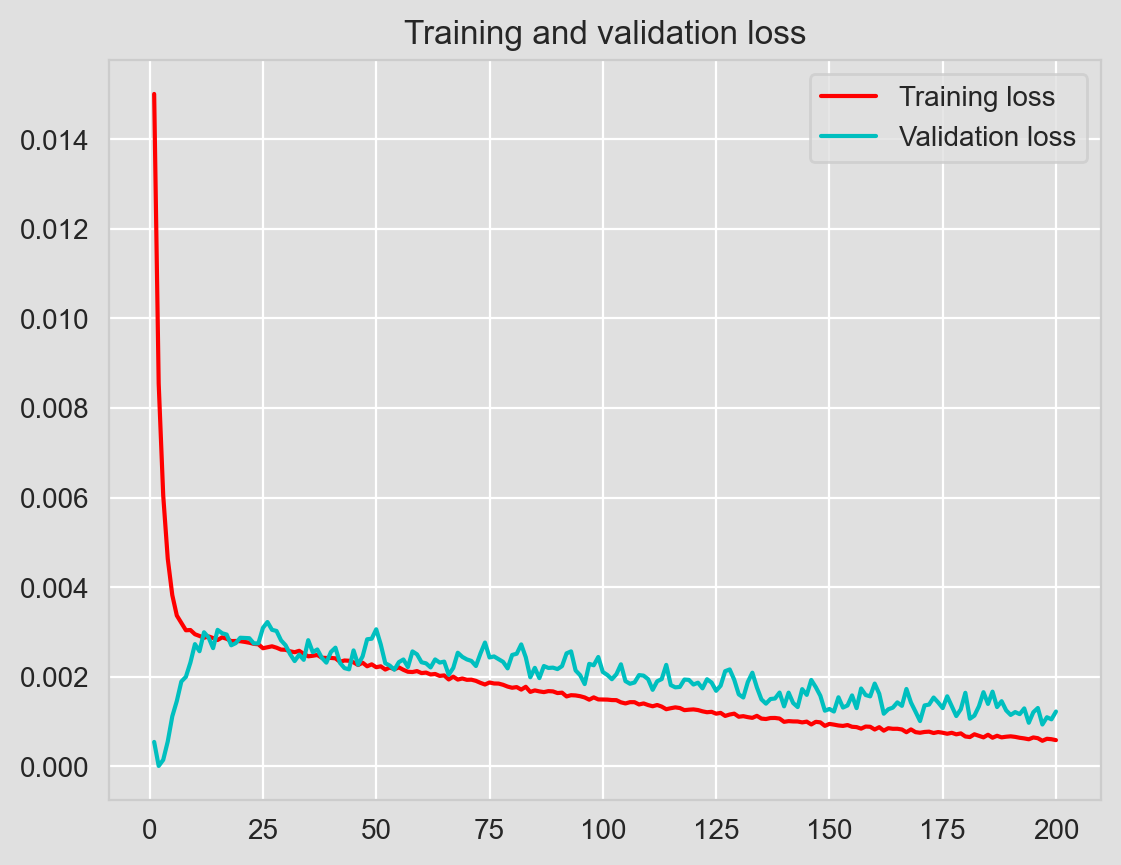

1/1 [==============================] - 0s 24ms/step
Shape of test_predict after flattening: (1,)
Train MSE = 0.00062 RMSE = 0.02491
Test MSE = 0.00004 RMSE = 0.00645
(145,) (5,)


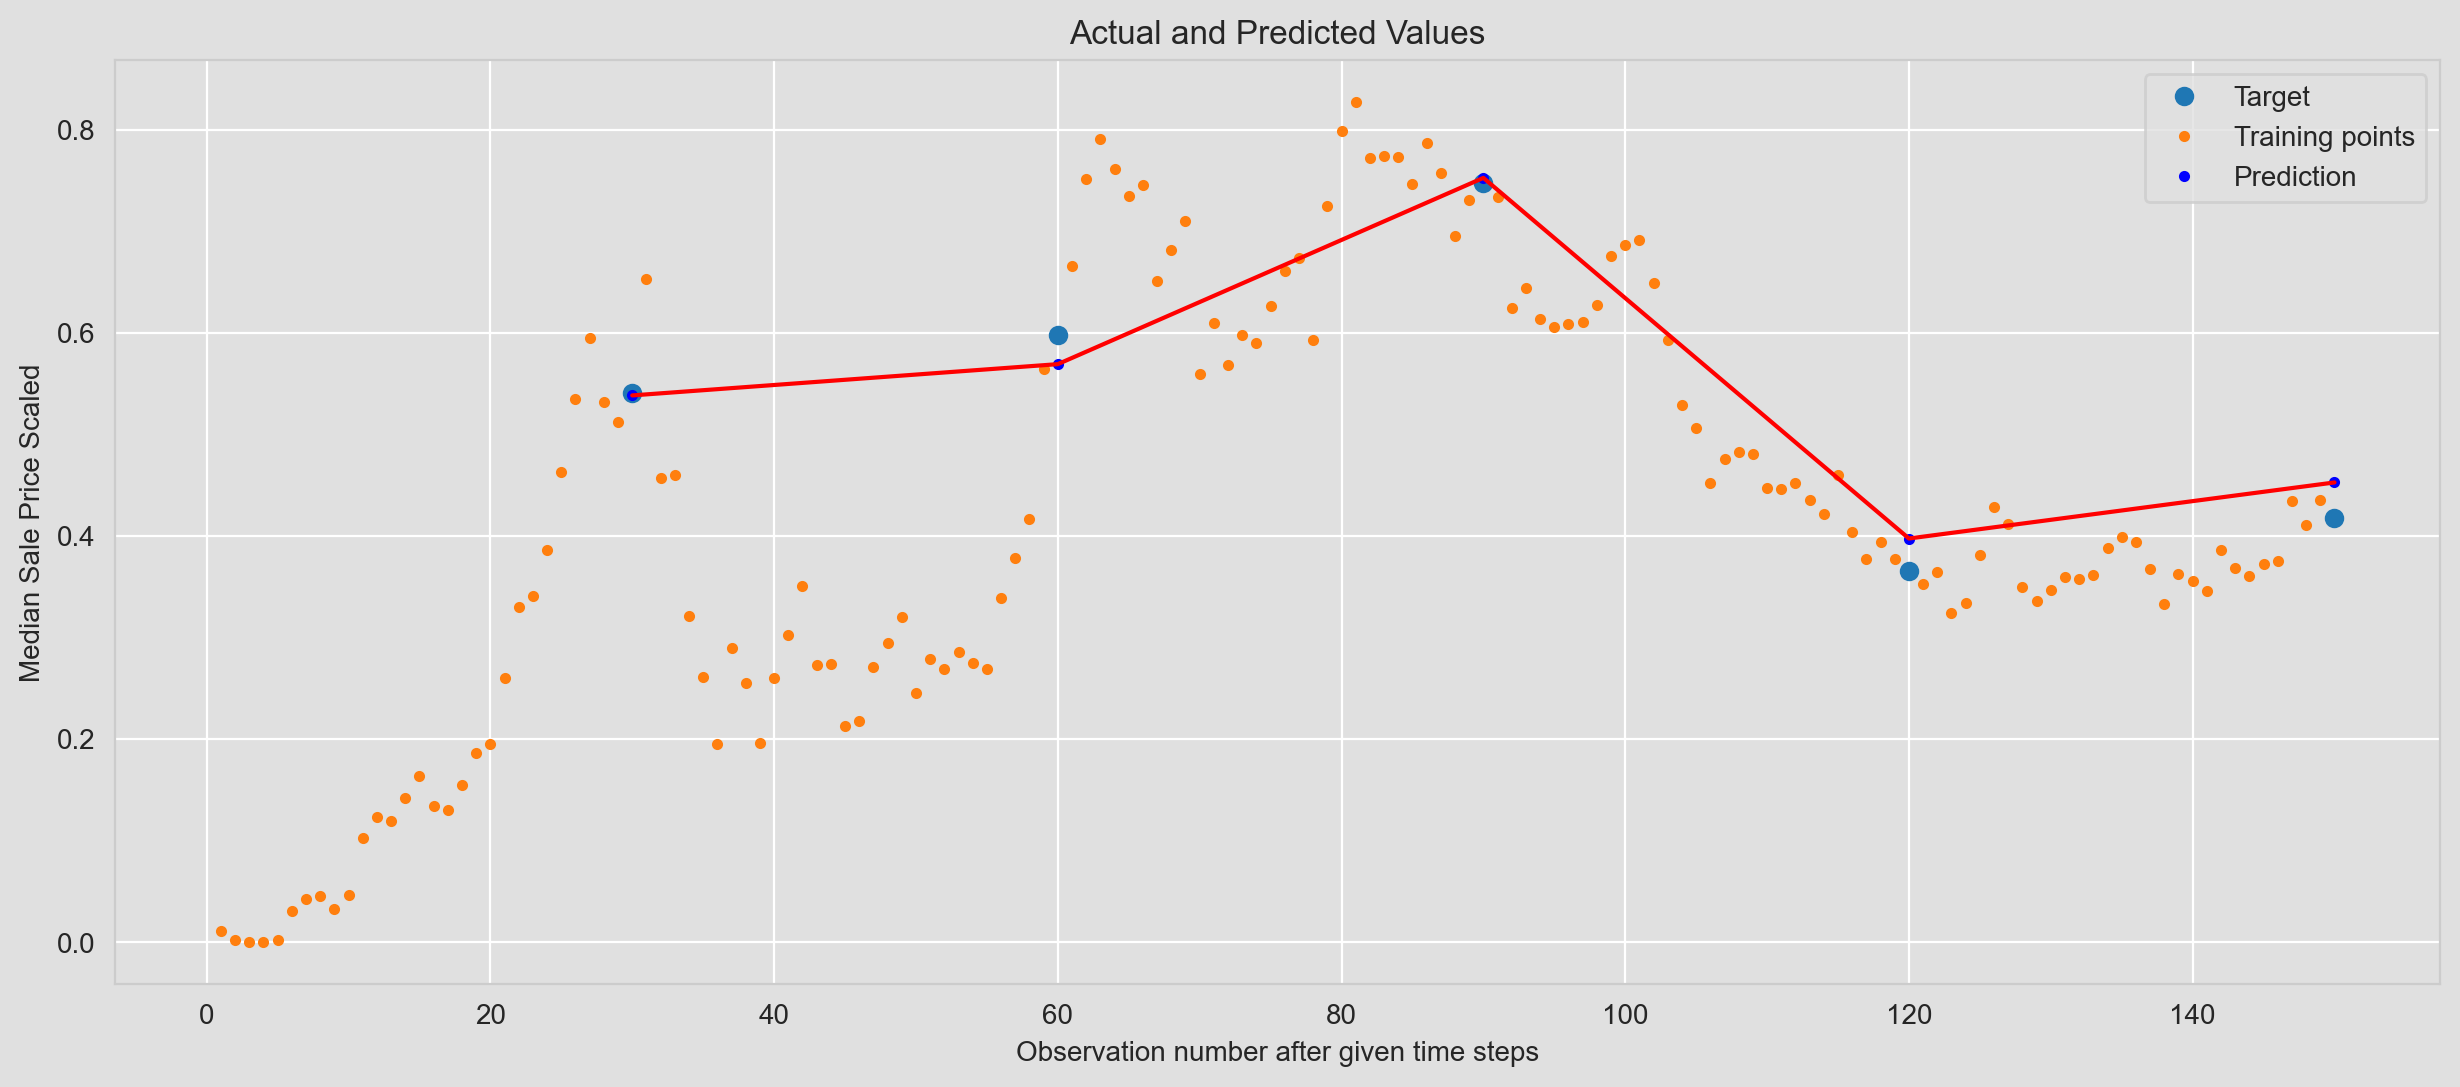

[codecarbon INFO @ 16:23:10] Energy consumed for RAM : 0.000409 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:10] Energy consumed for all GPUs : 0.001145 kWh. Total GPU Power : 17.00151871612965 W
[codecarbon INFO @ 16:23:10] Energy consumed for all CPUs : 0.001595 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:10] 0.003149 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:25] Energy consumed for RAM : 0.000433 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:25] Energy consumed for all GPUs : 0.001209 kWh. Total GPU Power : 15.374658981225231 W
[codecarbon INFO @ 16:23:25] Energy consumed for all CPUs : 0.001688 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:25] 0.003331 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:40] Energy consumed for RAM : 0.000457 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:40] Energy consumed for all GPUs : 0.001278 kWh. Total GPU Power : 16.6285342512124

In [196]:

np.random.seed(42)
tf.random.set_seed(42)

tracker = EmissionsTracker()
tracker.start()

model = Sequential()
model.add(
    GRU(
        recurrent_hidden_units,
        return_sequences=False,
        input_shape=(trainX.shape[1], trainX.shape[2]),
      
        activation="tanh",
    )
)


model.add(Dense(units=1, activation="linear"))

# COMPILE THE MODEL
model.compile(loss="MeanSquaredError", optimizer=optimizer)
model.summary()

history = model.fit(
    trainX,
    trainY,
    epochs=200,
    batch_size=int(f_batch * trainX.shape[0]),
    validation_split=validation_split,
    verbose=0,
)

emissions = tracker.stop()
print(f"Estimated CO2 emissions for training the GRU model: {emissions} kg")
# MAKE PREDICTIONS
train_predict = model.predict(trainX).squeeze()
test_predict = model.predict(testX).squeeze()


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(facecolor='#E0E0E0', dpi=200)  # Set the background color and DPI
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
plt.grid(color='white')  # Set the grid color to white for better visibility on the gray background
plt.show()


# Make predictions
train_predict = model.predict(trainX).flatten()
test_predict = model.predict(testX).flatten()  # Flattening to ensure it is a 1D array

# Now, print the shapes to verify
print("Shape of test_predict after flattening:", test_predict.shape)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = np.sqrt(mean_squared_error(testY, test_predict))

# Print MSE and RMSE
print("Train MSE = %.5f RMSE = %.5f" % (np.mean((trainY - train_predict) ** 2.0), train_rmse))
print("Test MSE = %.5f RMSE = %.5f" % (np.mean((testY - test_predict) ** 2.0), test_rmse))


# PLOT THE RESULT
def plot_result(trainY, testY, train_predict, test_predict):
    plt.figure(figsize=(15, 6), dpi=200, facecolor='#E0E0E0')  # Set higher DPI and background color for the figure
    plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
    # ORIGINAL DATA
    print(X.shape, Y.shape)
    plt.plot(Y_ind, Y, "o", label="Target")
    plt.plot(X_ind, X, ".", label="Training points")
    plt.plot(Y_ind, train_predict, "b.", label="Prediction")
    plt.plot(Y_ind, train_predict, "r-")
    plt.legend()
    plt.xlabel("Observation number after given time steps")
    plt.ylabel("Median Sale Price Scaled")
    plt.title("Actual and Predicted Values")
    plt.grid(color='white')  # Set grid color to white for better visibility
    plt.show()

# Call the function with your data
plot_result(trainY, testY, train_predict, test_predict)


Summary

| Model | RMSE   | MSE     | Carbon Cost(kg) |
|-------|--------|---------|-----------------|
| LSTM  | 0.1087 | 0.01182 | 2.87e-05        |
| RNN   | 0.09561| 0.00914 | 2.08e-05        |
| GRU   | 0.00645| 0.0004  | 3.12e-05        |
